In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Statistical libraries
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

# Create output directories
os.makedirs('cleaned_data', exist_ok=True)
os.makedirs('eda_visualizations', exist_ok=True)
os.makedirs('reports', exist_ok=True)

print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print()
print("Output directories created:")
print("  - cleaned_data/")
print("  - eda_visualizations/")
print("  - reports/")
print()

Pandas version: 2.2.3
NumPy version: 2.1.3
Matplotlib version: 3.9.3
Seaborn version: 0.13.2

Output directories created:
  - cleaned_data/
  - eda_visualizations/
  - reports/



In [4]:
print("LOADING DATASET 1: NFL PLAYING SURFACE ANALYTICS (2016-2017)")
# Define file paths - ADJUST THESE TO YOUR ACTUAL PATHS
dataset1_path = "nfl-playing-surface-analytics/"
dataset2_path = "NFL-Punt-Analytics-Competition/"
dataset3_path = "nfl-impact-detection/"

# Load Dataset 1: NFL Playing Surface Analytics
df1_injury = pd.read_csv(dataset1_path + "InjuryRecord.csv")
df1_playlist = pd.read_csv(dataset1_path + "PlayList.csv")
df1_tracking = pd.read_csv(dataset1_path + "PlayerTrackData.csv")

print("Dataset 1 (playing surface analytics) Files Loaded:")
print(f"  InjuryRecord.csv: {df1_injury.shape}")
print(f"  PlayList.csv: {df1_playlist.shape}")
print(f"  PlayerTrackData.csv: {df1_tracking.shape}")
print()

# Quick inspection
print("InjuryRecord.csv - First 3 rows:")
print(df1_injury.head(3))
print()
print("InjuryRecord.csv - Info:")
print(df1_injury.info())
print()
print("InjuryRecord.csv - Summary Statistics:")
print(df1_injury.describe())
print()

print("="*80)
print("LOADING DATASET 2: NFL PUNT ANALYTICS (2016-2017)")
print("="*80)
print()

# Load Dataset 2: NFL Punt Analytics
df2_game = pd.read_csv(dataset2_path + "game_data.csv")
df2_play_info = pd.read_csv(dataset2_path + "play_information.csv")
df2_role = pd.read_csv(dataset2_path + "play_player_role_data.csv")
df2_player = pd.read_csv(dataset2_path + "player_punt_data.csv")
df2_video = pd.read_csv(dataset2_path + "video_review.csv")

# Load NGS files - we'll combine them
ngs_files = [
    "NGS-2016-pre.csv", "NGS-2016-reg-wk1-6.csv", "NGS-2016-reg-wk7-12.csv",
    "NGS-2016-reg-wk13-17.csv", "NGS-2016-post.csv",
    "NGS-2017-pre.csv", "NGS-2017-reg-wk1-6.csv", "NGS-2017-reg-wk7-12.csv",
    "NGS-2017-reg-wk13-17.csv", "NGS-2017-post.csv"
]

ngs_list = []
for file in ngs_files:
    try:
        temp = pd.read_csv(dataset2_path + file)
        ngs_list.append(temp)
        print(f"  Loaded {file}: {temp.shape}")
    except FileNotFoundError:
        print(f"  WARNING: {file} not found, skipping...")

df2_ngs = pd.concat(ngs_list, ignore_index=True) if ngs_list else pd.DataFrame()

print()
print("Dataset 2 (nfl punt analytics) Files Loaded:")
print(f"  game_data.csv: {df2_game.shape}")
print(f"  play_information.csv: {df2_play_info.shape}")
print(f"  play_player_role_data.csv: {df2_role.shape}")
print(f"  player_punt_data.csv: {df2_player.shape}")
print(f"  video_review.csv: {df2_video.shape}")
print(f"  NGS combined: {df2_ngs.shape}")
print()

# Quick inspection
print("video_review.csv - First 3 rows:")
print(df2_video.head(3))
print()
print("video_review.csv - Info:")
print(df2_video.info())
print()

print("="*80)
print("LOADING DATASET 3: NFL IMPACT DETECTION (2019-2020)")
print("="*80)
print()

# Load Dataset 3: NFL Impact Detection
df3_train_labels = pd.read_csv(dataset3_path + "train_labels.csv")
df3_train_tracking = pd.read_csv(dataset3_path + "train_player_tracking.csv")
df3_test_tracking = pd.read_csv(dataset3_path + "test_player_tracking.csv")
df3_image_labels = pd.read_csv(dataset3_path + "image_labels.csv")

print("Dataset 3 (nfl impact detection) Files Loaded:")
print(f"  train_labels.csv: {df3_train_labels.shape}")
print(f"  train_player_tracking.csv: {df3_train_tracking.shape}")
print(f"  test_player_tracking.csv: {df3_test_tracking.shape}")
print(f"  image_labels.csv: {df3_image_labels.shape}")
print()

# Quick inspection
print("train_labels.csv - First 3 rows:")
print(df3_train_labels.head(3))
print()
print("train_labels.csv - Info:")
print(df3_train_labels.info())
print()
print("train_labels.csv - Summary Statistics:")
print(df3_train_labels.describe())
print()

print("="*80)
print("DATA LOADING SUMMARY")
print("="*80)
print()
print("DATASET 1 (Playing Surface Analytics):")
print(f"  Total injuries: {len(df1_injury)}")
print(f"  Total player-plays: {len(df1_playlist)}")
print(f"  Total tracking observations: {len(df1_tracking)}")
print()
print("DATASET 2 (Punt Analytics):")
print(f"  Total games: {len(df2_game)}")
print(f"  Total plays: {len(df2_play_info)}")
print(f"  Total concussions (video review): {len(df2_video)}")
print(f"  Total NGS observations: {len(df2_ngs)}")
print()
print("DATASET 3 (Impact Detection):")
print(f"  Total labeled frames: {len(df3_train_labels)}")
print(f"  Total training tracking observations: {len(df3_train_tracking)}")
print(f"  Total impacts: {df3_train_labels['impact'].sum()}")
print()

# Check for definitive impacts (Dataset 3)
if 'impact' in df3_train_labels.columns:
    definitive_impacts = df3_train_labels[
        (df3_train_labels['impact'] == 1) & 
        (df3_train_labels['confidence'] > 1) & 
        (df3_train_labels['visibility'] > 0)
    ]
    print(f"  Definitive impacts (impact=1, confidence>1, visibility>0): {len(definitive_impacts)}")
print()

print("ALL DATASETS LOADED SUCCESSFULLY!")
print()

LOADING DATASET 1: NFL PLAYING SURFACE ANALYTICS (2016-2017)
Dataset 1 (playing surface analytics) Files Loaded:
  InjuryRecord.csv: (105, 9)
  PlayList.csv: (267005, 14)
  PlayerTrackData.csv: (76366748, 9)

InjuryRecord.csv - First 3 rows:
   PlayerKey   GameID     PlayKey BodyPart    Surface  DM_M1  DM_M7  DM_M28  \
0      39873  39873-4  39873-4-32     Knee  Synthetic      1      1       1   
1      46074  46074-7  46074-7-26     Knee    Natural      1      1       0   
2      36557  36557-1  36557-1-70    Ankle  Synthetic      1      1       1   

   DM_M42  
0       1  
1       0  
2       1  

InjuryRecord.csv - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PlayerKey  105 non-null    int64 
 1   GameID     105 non-null    object
 2   PlayKey    77 non-null     object
 3   BodyPart   105 non-null    object
 4   Surface    105 non-null 

In [6]:
# PART 3: DATASET 1 - NFL PLAYING SURFACE ANALYTICS
# Data Quality Assessment and Cleaning


print("DATASET 1: DATA QUALITY ASSESSMENT")
print()

# 3.1: Missing Values Analysis
print("MISSING VALUES ANALYSIS")
print("-"*80)
print()

print("InjuryRecord.csv Missing Values:")
injury_missing = df1_injury.isnull().sum()
injury_missing_pct = (injury_missing / len(df1_injury)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': injury_missing,
    'Missing_Percentage': injury_missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0])
print()

print("PlayList.csv Missing Values:")
playlist_missing = df1_playlist.isnull().sum()
playlist_missing_pct = (playlist_missing / len(df1_playlist)) * 100
missing_df2 = pd.DataFrame({
    'Missing_Count': playlist_missing,
    'Missing_Percentage': playlist_missing_pct
})
print(missing_df2[missing_df2['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))
print()

# Check specific issues
print("Investigating PlayKey missing values in InjuryRecord:")
print(f"  Total injuries: {len(df1_injury)}")
print(f"  Injuries with PlayKey: {df1_injury['PlayKey'].notna().sum()}")
print(f"  Injuries without PlayKey: {df1_injury['PlayKey'].isna().sum()}")
print()

# 3.2: Duplicate Detection
print("DUPLICATE DETECTION")

print("Checking for duplicate injuries:")
injury_dups = df1_injury.duplicated(subset=['PlayerKey', 'GameID']).sum()
print(f"  Duplicate PlayerKey-GameID combinations: {injury_dups}")

injury_full_dups = df1_injury.duplicated().sum()
print(f"  Fully duplicate rows: {injury_full_dups}")
print()

print("Checking for duplicate player-plays:")
playlist_dups = df1_playlist.duplicated(subset=['PlayerKey', 'GameID', 'PlayKey']).sum()
print(f"  Duplicate PlayerKey-GameID-PlayKey combinations: {playlist_dups}")
print()

# 3.3: Data Type Validation and Value Ranges
print("DATA TYPE VALIDATION")

print("InjuryRecord.csv Data Types:")
print(df1_injury.dtypes)
print()

print("Unique values in categorical columns:")
print(f"  BodyPart: {df1_injury['BodyPart'].unique()}")
print(f"  Surface: {df1_injury['Surface'].unique()}")
print()

print("Severity indicator distributions:")
print(f"  DM_M1 (1+ days):  {df1_injury['DM_M1'].sum()} injuries ({df1_injury['DM_M1'].mean()*100:.1f}%)")
print(f"  DM_M7 (7+ days):  {df1_injury['DM_M7'].sum()} injuries ({df1_injury['DM_M7'].mean()*100:.1f}%)")
print(f"  DM_M28 (28+ days): {df1_injury['DM_M28'].sum()} injuries ({df1_injury['DM_M28'].mean()*100:.1f}%)")
print(f"  DM_M42 (42+ days): {df1_injury['DM_M42'].sum()} injuries ({df1_injury['DM_M42'].mean()*100:.1f}%)")
print()

print("PlayList.csv categorical columns:")
print("\nRosterPosition unique values:", df1_playlist['RosterPosition'].nunique())
print(df1_playlist['RosterPosition'].value_counts().head(10))
print()

print("\nFieldType unique values:", df1_playlist['FieldType'].nunique())
print(df1_playlist['FieldType'].value_counts())
print()

print("\nStadiumType unique values:", df1_playlist['StadiumType'].nunique())
print(df1_playlist['StadiumType'].value_counts())
print()

# 3.4: Outlier Detection - Temperature
print("OUTLIER DETECTION - TEMPERATURE")
print()

print("Temperature distribution:")
print(df1_playlist['Temperature'].describe())
print()

# Check for anomalous values
temp_negative = df1_playlist[df1_playlist['Temperature'] < 0]
print(f"Rows with negative temperature: {len(temp_negative)}")
if len(temp_negative) > 0:
    print(temp_negative[['Temperature', 'StadiumType', 'FieldType']].head())
print()

temp_extreme_hot = df1_playlist[df1_playlist['Temperature'] > 100]
print(f"Rows with temperature > 100°F: {len(temp_extreme_hot)}")
print()

# 3.5: Create merged injury dataset for analysis
print("MERGING INJURY DATA WITH PLAY CONTEXT")

# Merge injury records with play details
df1_merged = df1_injury.merge(
    df1_playlist,
    on=['PlayerKey', 'GameID', 'PlayKey'],
    how='left',
    indicator=True
)

print(f"Original injuries: {len(df1_injury)}")
print(f"Merged records: {len(df1_merged)}")
print(f"Merge indicator distribution:")
print(df1_merged['_merge'].value_counts())
print()

# Check merge quality
print("Injuries that merged successfully:")
successful_merge = df1_merged[df1_merged['_merge'] == 'both']
print(f"  Count: {len(successful_merge)} ({len(successful_merge)/len(df1_injury)*100:.1f}%)")
print()

print("Injuries that did NOT merge (missing PlayKey or no matching play):")
failed_merge = df1_merged[df1_merged['_merge'] == 'left_only']
print(f"  Count: {len(failed_merge)} ({len(failed_merge)/len(df1_injury)*100:.1f}%)")
print()

# Save merge status for later investigation
df1_injury_merged = df1_merged.copy()


DATASET 1: DATA QUALITY ASSESSMENT

MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------

InjuryRecord.csv Missing Values:
         Missing_Count  Missing_Percentage
PlayKey             28              26.667

PlayList.csv Missing Values:
             Missing_Count  Missing_Percentage
Weather              18691               7.000
StadiumType          16910               6.333
PlayType               367               0.137

Investigating PlayKey missing values in InjuryRecord:
  Total injuries: 105
  Injuries with PlayKey: 77
  Injuries without PlayKey: 28

DUPLICATE DETECTION
Checking for duplicate injuries:
  Duplicate PlayerKey-GameID combinations: 1
  Fully duplicate rows: 0

Checking for duplicate player-plays:
  Duplicate PlayerKey-GameID-PlayKey combinations: 0

DATA TYPE VALIDATION
InjuryRecord.csv Data Types:
PlayerKey     int64
GameID       object
PlayKey      object
BodyPart     object
Surface      object
DM_M1         int6

In [8]:
# PART 4: DATASET 1 - DATA CLEANING

print("DATASET 1: DATA CLEANING")

# 4.1: Clean Temperature (Replace -999 with median)
print("CLEANING TEMPERATURE")
# Calculate median from valid temperatures (exclude -999)
valid_temps = df1_playlist[df1_playlist['Temperature'] > 0]['Temperature']
median_temp = valid_temps.median()

print(f"Valid temperature range: {valid_temps.min():.1f}°F to {valid_temps.max():.1f}°F")
print(f"Valid temperature median: {median_temp:.1f}°F")
print(f"Invalid temperatures (-999): {(df1_playlist['Temperature'] == -999).sum()}")
print()

# Replace -999 with median
df1_playlist['Temperature_Original'] = df1_playlist['Temperature'].copy()
df1_playlist['Temperature'] = df1_playlist['Temperature'].replace(-999, median_temp)

print(f"After cleaning:")
print(f"  Mean temperature: {df1_playlist['Temperature'].mean():.1f}°F")
print(f"  Median temperature: {df1_playlist['Temperature'].median():.1f}°F")
print(f"  Rows with -999: {(df1_playlist['Temperature'] == -999).sum()}")
print()

# 4.2: Standardize StadiumType (29 variations → 3 categories)
print("STANDARDIZING STADIUM TYPE")

print("Original StadiumType variations:")
print(df1_playlist['StadiumType'].value_counts())
print()

# Create standardized stadium type
def standardize_stadium(stadium_str):
    """Standardize stadium types to Indoor, Outdoor, or Retractable"""
    if pd.isna(stadium_str):
        return 'Unknown'
    
    stadium_lower = str(stadium_str).lower()
    
    # Indoor keywords
    if any(keyword in stadium_lower for keyword in ['indoor', 'dome', 'closed']):
        # Check if it's retractable but closed
        if 'retr' in stadium_lower or 'retractable' in stadium_lower:
            return 'Retractable'
        return 'Indoor'
    
    # Retractable keywords
    if any(keyword in stadium_lower for keyword in ['retr', 'retractable']):
        return 'Retractable'
    
    # Outdoor keywords (default)
    if any(keyword in stadium_lower for keyword in ['outdoor', 'open', 'outside', 'bowl']):
        return 'Outdoor'
    
    # Stadium names (e.g., Heinz Field) default to Outdoor
    return 'Outdoor'

df1_playlist['StadiumType_Original'] = df1_playlist['StadiumType'].copy()
df1_playlist['StadiumType'] = df1_playlist['StadiumType'].apply(standardize_stadium)

print("Standardized StadiumType distribution:")
print(df1_playlist['StadiumType'].value_counts())
print()

# 4.3: Handle Missing Weather (fill with 'Unknown')
print("HANDLING MISSING WEATHER")

print(f"Missing weather values: {df1_playlist['Weather'].isna().sum()}")
df1_playlist['Weather'] = df1_playlist['Weather'].fillna('Unknown')
print(f"After filling: {df1_playlist['Weather'].isna().sum()}")
print()

# 4.4: Feature Engineering - Create Severity Category
print("FEATURE ENGINEERING - SEVERITY CATEGORIES")

def categorize_severity(row):
    """Create severity categories from DM indicators"""
    if row['DM_M28'] == 1:  # 28+ days
        return 'Moderate'  # We call 28+ days moderate
    elif row['DM_M7'] == 1:  # 7-27 days
        return 'Minor'
    else:  # 1-6 days
        return 'Minor'

df1_injury['Severity'] = df1_injury.apply(categorize_severity, axis=1)

print("Severity distribution:")
print(df1_injury['Severity'].value_counts())
print()
print("Cross-check with DM_M28:")
print(pd.crosstab(df1_injury['Severity'], df1_injury['DM_M28']))
print()

# 4.5: Feature Engineering - Temporal Variables
print("4.5 FEATURE ENGINEERING - TEMPORAL VARIABLES")

# Normalize PlayerDay (0-1 scale)
df1_playlist['PlayerDay_Normalized'] = (
    df1_playlist['PlayerDay'] - df1_playlist['PlayerDay'].min()
) / (df1_playlist['PlayerDay'].max() - df1_playlist['PlayerDay'].min())

# Normalize PlayerGame (proportion of season)
df1_playlist['GameProgress'] = df1_playlist['PlayerGame'] / 16  # 16 game season

print("Temporal features created:")
print(f"  PlayerDay range: {df1_playlist['PlayerDay'].min()} to {df1_playlist['PlayerDay'].max()}")
print(f"  PlayerDay_Normalized range: {df1_playlist['PlayerDay_Normalized'].min():.3f} to {df1_playlist['PlayerDay_Normalized'].max():.3f}")
print(f"  GameProgress range: {df1_playlist['GameProgress'].min():.3f} to {df1_playlist['GameProgress'].max():.3f}")
print()

# 4.6: Create Clean Merged Dataset
print("CREATING CLEAN MERGED DATASET")


# Merge with cleaned playlist
df1_clean = df1_injury.merge(
    df1_playlist[['PlayerKey', 'GameID', 'PlayKey', 'RosterPosition', 
                  'PlayerDay', 'PlayerGame', 'StadiumType', 'FieldType', 
                  'Temperature', 'Weather', 'PlayType', 'Position', 
                  'PositionGroup', 'PlayerDay_Normalized', 'GameProgress']],
    on=['PlayerKey', 'GameID', 'PlayKey'],
    how='left'
)

print(f"Clean merged dataset shape: {df1_clean.shape}")
print(f"Injuries with complete data: {df1_clean.dropna(subset=['RosterPosition']).shape[0]}")
print()

# Create subset with complete cases only
df1_complete = df1_clean.dropna(subset=['PlayKey', 'RosterPosition'])

print(f"Complete cases (no missing key variables): {len(df1_complete)}")
print(f"Percentage of injuries with complete data: {len(df1_complete)/len(df1_injury)*100:.1f}%")
print()

# 4.7: Summary of Cleaned Dataset
print("CLEANED DATASET SUMMARY")

print("Dataset 1 Cleaning Complete")
print("Final cleaned datasets:")
print(f"  df1_injury: {df1_injury.shape} (all injuries with severity)")
print(f"  df1_playlist: {df1_playlist.shape} (all plays with cleaned variables)")
print(f"  df1_clean: {df1_clean.shape} (merged injury + play context)")
print(f"  df1_complete: {df1_complete.shape} (complete cases only)")
print()

DATASET 1: DATA CLEANING
CLEANING TEMPERATURE
Valid temperature range: 9.0°F to 97.0°F
Valid temperature median: 62.0°F
Invalid temperatures (-999): 0

After cleaning:
  Mean temperature: 61.0°F
  Median temperature: 62.0°F
  Rows with -999: 0

STANDARDIZING STADIUM TYPE
Original StadiumType variations:
StadiumType
Outdoor        186128
Indoor          48816
Unknown         16910
Retractable     15151
Name: count, dtype: int64

Standardized StadiumType distribution:
StadiumType
Outdoor        203038
Indoor          48816
Retractable     15151
Name: count, dtype: int64

HANDLING MISSING WEATHER
Missing weather values: 0
After filling: 0

FEATURE ENGINEERING - SEVERITY CATEGORIES
Severity distribution:
Severity
Minor       68
Moderate    37
Name: count, dtype: int64

Cross-check with DM_M28:
DM_M28     0   1
Severity        
Minor     68   0
Moderate   0  37

4.5 FEATURE ENGINEERING - TEMPORAL VARIABLES
Temporal features created:
  PlayerDay range: -62 to 480
  PlayerDay_Normalized range

DATASET 1: EXPLORATORY DATA ANALYSIS
Analyzing 77 complete injury cases

CREATING INJURY DISTRIBUTION VISUALIZATIONS
Saved: Dataset1_Comprehensive_EDA.png


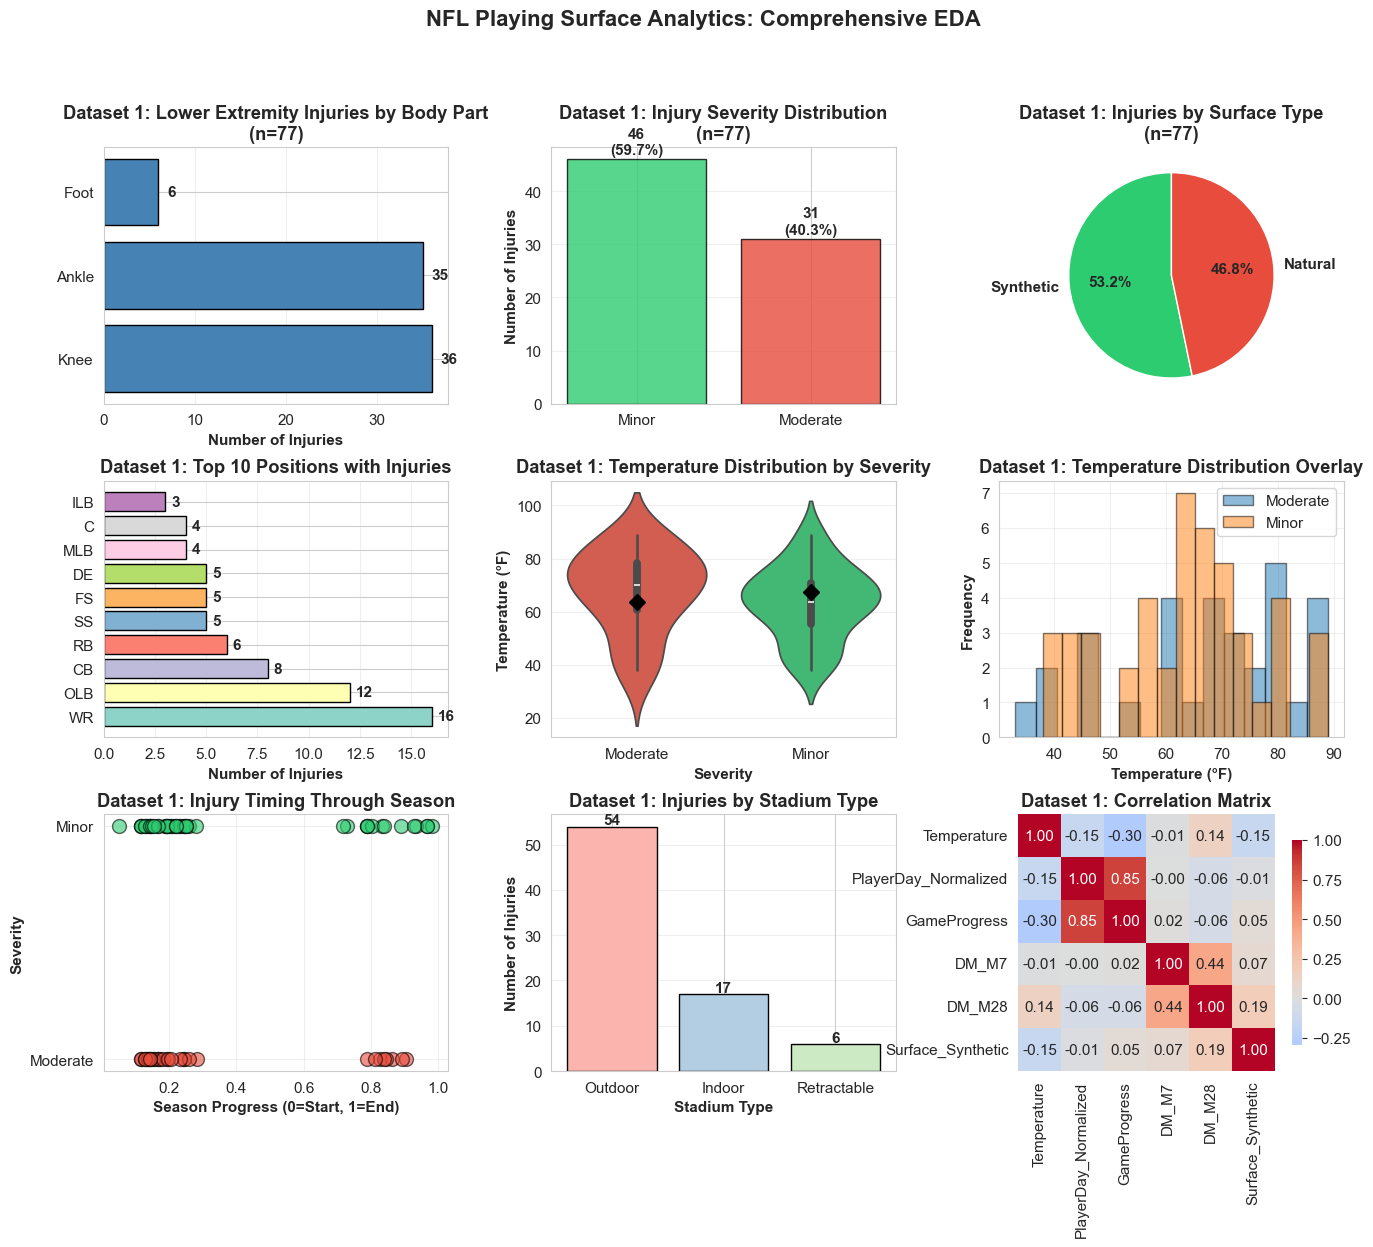


STATISTICAL TESTS
Chi-Square Test: Surface Type vs Injury Severity
Severity   Minor  Moderate
Surface                   
Natural       25        11
Synthetic     21        20
  Chi-square statistic: 1.9437
  P-value: 0.1633
  Significant at α=0.05? No

T-Test: Temperature difference between Minor vs Moderate injuries
  Minor injuries mean temp: 63.5°F (SD: 13.6)
  Moderate injuries mean temp: 67.5°F (SD: 15.8)
  T-statistic: -1.1821
  P-value: 0.2409
  Significant at α=0.05? No

Exposure-Adjusted Injury Rates by Surface Type
  Natural: 36 injuries / 156902 plays = 0.0229%
  Synthetic: 41 injuries / 110103 plays = 0.0372%
  Rate Ratio (Synthetic/Natural): 1.62

DATASET 1 EDA COMPLETE


In [21]:
# PART 5: DATASET 1 - EXPLORATORY DATA ANALYSIS
print("DATASET 1: EXPLORATORY DATA ANALYSIS")

# Use df1_complete (77 complete cases) for analysis
df_analysis = df1_complete.copy()

print(f"Analyzing {len(df_analysis)} complete injury cases")
print()

# 5.1: INJURY DISTRIBUTION VISUALIZATIONS
print("CREATING INJURY DISTRIBUTION VISUALIZATIONS")

# Create figure with multiple subplots
fig = plt.figure(figsize=(16, 12))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# --- Plot 1: Body Part Distribution (Histogram/Bar) ---
ax1 = fig.add_subplot(gs[0, 0])
bodypart_counts = df_analysis['BodyPart'].value_counts()
ax1.barh(bodypart_counts.index, bodypart_counts.values, color='steelblue', edgecolor='black')
ax1.set_xlabel('Number of Injuries', fontweight='bold')
ax1.set_title('Dataset 1: Lower Extremity Injuries by Body Part\n(n=77)', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(bodypart_counts.values):
    ax1.text(v + 1, i, str(v), va='center', fontweight='bold')

# --- Plot 2: Severity Distribution (Histogram) ---
ax2 = fig.add_subplot(gs[0, 1])
severity_counts = df_analysis['Severity'].value_counts()
colors_sev = ['#2ecc71', '#e74c3c']
bars = ax2.bar(severity_counts.index, severity_counts.values, color=colors_sev, 
               edgecolor='black', alpha=0.8)
ax2.set_ylabel('Number of Injuries', fontweight='bold')
ax2.set_title('Dataset 1: Injury Severity Distribution\n(n=77)', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for bar, count in zip(bars, severity_counts.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 1,
             f'{count}\n({count/len(df_analysis)*100:.1f}%)',
             ha='center', fontweight='bold')

# --- Plot 3: Surface Type Distribution (Pie Chart) ---
ax3 = fig.add_subplot(gs[0, 2])
surface_counts = df_analysis['Surface'].value_counts()
colors_surface = ['#2ecc71', '#e74c3c']
ax3.pie(surface_counts.values, labels=surface_counts.index, autopct='%1.1f%%',
        colors=colors_surface, startangle=90, textprops={'fontweight': 'bold'})
ax3.set_title('Dataset 1: Injuries by Surface Type\n(n=77)', fontweight='bold')

# --- Plot 4: Position Distribution (Horizontal Bar) ---
ax4 = fig.add_subplot(gs[1, 0])
position_counts = df_analysis['Position'].value_counts().head(10)
colors_pos = plt.cm.Set3(range(len(position_counts)))
ax4.barh(position_counts.index, position_counts.values, color=colors_pos, edgecolor='black')
ax4.set_xlabel('Number of Injuries', fontweight='bold')
ax4.set_title('Dataset 1: Top 10 Positions with Injuries', fontweight='bold')
ax4.grid(axis='x', alpha=0.3)
for i, v in enumerate(position_counts.values):
    ax4.text(v + 0.3, i, str(v), va='center', fontweight='bold')

# --- Plot 5: Temperature Distribution (Violin Plot by Severity) ---
ax5 = fig.add_subplot(gs[1, 1])
sns.violinplot(data=df_analysis, x='Severity', y='Temperature', ax=ax5,
               palette={'Minor': '#2ecc71', 'Moderate': '#e74c3c'})
ax5.set_ylabel('Temperature (°F)', fontweight='bold')
ax5.set_xlabel('Severity', fontweight='bold')
ax5.set_title('Dataset 1: Temperature Distribution by Severity', fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

# Add mean markers
for i, severity in enumerate(['Minor', 'Moderate']):
    data = df_analysis[df_analysis['Severity'] == severity]['Temperature']
    mean_val = data.mean()
    ax5.plot(i, mean_val, 'D', color='black', markersize=8, label=f'{severity} mean' if i == 0 else '')

# --- Plot 6: Temperature KDE by Severity ---
ax6 = fig.add_subplot(gs[1, 2])
for severity in df_analysis['Severity'].unique():
    data = df_analysis[df_analysis['Severity'] == severity]['Temperature']
    ax6.hist(data, bins=15, alpha=0.5, label=severity, edgecolor='black')
ax6.set_xlabel('Temperature (°F)', fontweight='bold')
ax6.set_ylabel('Frequency', fontweight='bold')
ax6.set_title('Dataset 1: Temperature Distribution Overlay', fontweight='bold')
ax6.legend()
ax6.grid(alpha=0.3)

# --- Plot 7: Temporal Progression (Strip Plot) ---
ax7 = fig.add_subplot(gs[2, 0])
severity_colors = {'Minor': '#2ecc71', 'Moderate': '#e74c3c'}
for severity in df_analysis['Severity'].unique():
    data = df_analysis[df_analysis['Severity'] == severity]
    ax7.scatter(data['PlayerDay_Normalized'], [severity]*len(data), 
                alpha=0.6, s=100, label=severity, color=severity_colors[severity],
                edgecolor='black')
ax7.set_xlabel('Season Progress (0=Start, 1=End)', fontweight='bold')
ax7.set_ylabel('Severity', fontweight='bold')
ax7.set_title('Dataset 1: Injury Timing Through Season', fontweight='bold')
ax7.grid(alpha=0.3)

# --- Plot 8: Stadium Type Distribution ---
ax8 = fig.add_subplot(gs[2, 1])
stadium_counts = df_analysis['StadiumType'].value_counts()
colors_stadium = plt.cm.Pastel1(range(len(stadium_counts)))
bars = ax8.bar(stadium_counts.index, stadium_counts.values, color=colors_stadium,
               edgecolor='black')
ax8.set_ylabel('Number of Injuries', fontweight='bold')
ax8.set_xlabel('Stadium Type', fontweight='bold')
ax8.set_title('Dataset 1: Injuries by Stadium Type', fontweight='bold')
ax8.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{int(height)}', ha='center', fontweight='bold')

# --- Plot 9: Correlation Matrix ---
ax9 = fig.add_subplot(gs[2, 2])
# Select numeric columns for correlation
numeric_cols = ['Temperature', 'PlayerDay_Normalized', 'GameProgress', 'DM_M7', 'DM_M28']
corr_data = df_analysis[numeric_cols].copy()
# Binary encode surface
corr_data['Surface_Synthetic'] = (df_analysis['Surface'] == 'Synthetic').astype(int)
corr_matrix = corr_data.corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, ax=ax9, cbar_kws={'shrink': 0.8})
ax9.set_title('Dataset 1: Correlation Matrix', fontweight='bold')

plt.suptitle('NFL Playing Surface Analytics: Comprehensive EDA', 
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig('eda_visualizations/Dataset1_Comprehensive_EDA.png', 
            dpi=300, bbox_inches='tight')
print("Saved: Dataset1_Comprehensive_EDA.png")
plt.show()

print()

# 5.2: STATISTICAL TESTS
print("STATISTICAL TESTS")
# Chi-square: Surface vs Injury Occurrence
print("Chi-Square Test: Surface Type vs Injury Severity")
contingency_table = pd.crosstab(df_analysis['Surface'], df_analysis['Severity'])
print(contingency_table)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"  Chi-square statistic: {chi2:.4f}")
print(f"  P-value: {p_value:.4f}")
print(f"  Significant at α=0.05? {'Yes' if p_value < 0.05 else 'No'}")
print()

# T-test: Temperature difference between severity levels
print("T-Test: Temperature difference between Minor vs Moderate injuries")
minor_temp = df_analysis[df_analysis['Severity'] == 'Minor']['Temperature']
moderate_temp = df_analysis[df_analysis['Severity'] == 'Moderate']['Temperature']
t_stat, t_pval = ttest_ind(minor_temp, moderate_temp)
print(f"  Minor injuries mean temp: {minor_temp.mean():.1f}°F (SD: {minor_temp.std():.1f})")
print(f"  Moderate injuries mean temp: {moderate_temp.mean():.1f}°F (SD: {moderate_temp.std():.1f})")
print(f"  T-statistic: {t_stat:.4f}")
print(f"  P-value: {t_pval:.4f}")
print(f"  Significant at α=0.05? {'Yes' if t_pval < 0.05 else 'No'}")
print()

# Exposure-adjusted injury rates by surface
print("Exposure-Adjusted Injury Rates by Surface Type")
# Get total plays by surface from full playlist
surface_exposures = df1_playlist['FieldType'].value_counts()
injury_by_surface = df_analysis['Surface'].value_counts()

for surface in ['Natural', 'Synthetic']:
    injuries = injury_by_surface.get(surface, 0)
    exposures = surface_exposures.get(surface, 1)
    rate = (injuries / exposures) * 100
    print(f"  {surface}: {injuries} injuries / {exposures} plays = {rate:.4f}%")

# Rate ratio
natural_rate = (injury_by_surface.get('Natural', 0) / surface_exposures.get('Natural', 1))
synthetic_rate = (injury_by_surface.get('Synthetic', 0) / surface_exposures.get('Synthetic', 1))
rate_ratio = synthetic_rate / natural_rate if natural_rate > 0 else 0
print(f"  Rate Ratio (Synthetic/Natural): {rate_ratio:.2f}")
print()

print("DATASET 1 EDA COMPLETE")
print("="*80)


In [10]:
# PART 6: DATASET 2 - NFL PUNT ANALYTICS
# Data Quality Assessment and Cleaning


print("DATASET 2: DATA QUALITY ASSESSMENT - NFL PUNT ANALYTICS")

# 6.1: Missing Values Analysis
print("MISSING VALUES ANALYSIS")
print("-"*80)
print()

print("video_review.csv (Concussion data) Missing Values:")
video_missing = df2_video.isnull().sum()
video_missing_pct = (video_missing / len(df2_video)) * 100
missing_video = pd.DataFrame({
    'Missing_Count': video_missing,
    'Missing_Percentage': video_missing_pct
})
print(missing_video[missing_video['Missing_Count'] > 0])
print()

print("game_data.csv Missing Values:")
game_missing = df2_game.isnull().sum()
print(f"  Total missing values: {game_missing.sum()}")
if game_missing.sum() > 0:
    print(game_missing[game_missing > 0])
print()

print("play_information.csv Missing Values:")
play_missing = df2_play_info.isnull().sum()
print(f"  Total missing values: {play_missing.sum()}")
if play_missing.sum() > 0:
    print(play_missing[play_missing > 0])
print()

# 6.2: Examine Concussion Data (video_review.csv)
print("CONCUSSION DATA EXAMINATION")
print(f"Total documented concussions: {len(df2_video)}")
print()

print("Primary Impact Type distribution:")
print(df2_video['Primary_Impact_Type'].value_counts())
print()

print("Player Activity distribution:")
print(df2_video['Player_Activity_Derived'].value_counts())
print()

print("Friendly Fire incidents:")
print(df2_video['Friendly_Fire'].value_counts())
print()

# 6.3: Merge Concussion Data with Play Information
print("MERGING CONCUSSION DATA WITH PLAY CONTEXT")

# Merge video review (concussions) with play information
df2_concussion = df2_video.merge(
    df2_play_info,
    on=['Season_Year', 'GameKey', 'PlayID'],
    how='left'
)

print(f"Concussions with play information: {len(df2_concussion)}")
print(f"Successful merge: {df2_concussion['Quarter'].notna().sum()} of {len(df2_video)}")
print()

# Merge with game data
df2_concussion = df2_concussion.merge(
    df2_game,
    on=['Season_Year', 'GameKey'],
    how='left'
)

print(f"Concussions with game information: {len(df2_concussion)}")
print()

# Merge with player role data
df2_concussion = df2_concussion.merge(
    df2_role,
    left_on=['Season_Year', 'GameKey', 'PlayID', 'GSISID'],
    right_on=['Season_Year', 'GameKey', 'PlayID', 'GSISID'],
    how='left'
)

print(f"Concussions with player role: {df2_concussion['Role'].notna().sum()} of {len(df2_video)}")
print()

# 6.4: Parse Game Context Variables
print("PARSING GAME CONTEXT VARIABLES")

# Parse Game Clock (mm:ss → seconds)
def parse_game_clock(clock_str):
    """Convert mm:ss to seconds remaining in quarter"""
    if pd.isna(clock_str):
        return np.nan
    try:
        parts = str(clock_str).split(':')
        minutes = int(parts[0])
        seconds = int(parts[1])
        return minutes * 60 + seconds
    except:
        return np.nan

df2_concussion['Seconds_Remaining'] = df2_concussion['Game_Clock'].apply(parse_game_clock)
print(f"Seconds_Remaining created: {df2_concussion['Seconds_Remaining'].notna().sum()} valid values")
print(f"  Range: {df2_concussion['Seconds_Remaining'].min():.0f} to {df2_concussion['Seconds_Remaining'].max():.0f} seconds")
print()

# Parse Score (Home-Visiting → differential)
def parse_score(score_str):
    """Parse 'XX-YY' format to home score, visiting score, and differential"""
    if pd.isna(score_str):
        return np.nan, np.nan, np.nan
    try:
        parts = str(score_str).split('-')
        home = int(parts[0])
        visiting = int(parts[1])
        diff = home - visiting
        return home, visiting, diff
    except:
        return np.nan, np.nan, np.nan

score_parsed = df2_concussion['Score_Home_Visiting'].apply(parse_score)
df2_concussion['Home_Score'] = score_parsed.apply(lambda x: x[0])
df2_concussion['Visiting_Score'] = score_parsed.apply(lambda x: x[1])
df2_concussion['Score_Diff'] = score_parsed.apply(lambda x: x[2])

print(f"Score parsed: {df2_concussion['Score_Diff'].notna().sum()} valid values")
print(f"  Score differential range: {df2_concussion['Score_Diff'].min():.0f} to {df2_concussion['Score_Diff'].max():.0f}")
print()

# Parse Yard Line (TEAM YY → numeric)
def parse_yardline(yardline_str):
    """Parse 'ABC YY' format to numeric yard line (0-50)"""
    if pd.isna(yardline_str):
        return np.nan
    try:
        parts = str(yardline_str).split()
        yard = int(parts[-1])
        # Convert to field position (0-50 from midfield)
        return min(yard, 100 - yard)
    except:
        return np.nan

df2_concussion['YardLine_Number'] = df2_concussion['YardLine'].apply(parse_yardline)
print(f"YardLine_Number created: {df2_concussion['YardLine_Number'].notna().sum()} valid values")
print(f"  Range: {df2_concussion['YardLine_Number'].min():.0f} to {df2_concussion['YardLine_Number'].max():.0f} yards")
print()

# 6.5: Clean Temperature and Weather
print("CLEANING TEMPERATURE AND WEATHER")

print(f"Temperature before cleaning:")
print(f"  Valid values: {df2_concussion['Temperature'].notna().sum()}")
print(f"  Range: {df2_concussion['Temperature'].min()} to {df2_concussion['Temperature'].max()}")
print()

# No temperature cleaning needed for this dataset (no -999 values)
# But let's check Stadium Type
print("Stadium Type distribution:")
print(df2_concussion['StadiumType'].value_counts())
print()

# Standardize stadium type using same function
df2_concussion['StadiumType_Original'] = df2_concussion['StadiumType'].copy()
df2_concussion['StadiumType'] = df2_concussion['StadiumType'].apply(standardize_stadium)

print("Standardized Stadium Type:")
print(df2_concussion['StadiumType'].value_counts())
print()

# Standardize Turf
print("Turf type distribution:")
print(df2_concussion['Turf'].value_counts().head(10))
print()

def standardize_turf(turf_str):
    """Standardize turf to Natural or Synthetic"""
    if pd.isna(turf_str):
        return 'Unknown'
    turf_lower = str(turf_str).lower()
    if 'natural' in turf_lower or 'grass' in turf_lower:
        return 'Natural'
    else:
        return 'Synthetic'

df2_concussion['Turf_Type'] = df2_concussion['Turf'].apply(standardize_turf)
print("Standardized Turf Type:")
print(df2_concussion['Turf_Type'].value_counts())
print()

# 6.6: Role Aggregation
print("AGGREGATING PLAYER ROLES")

print("Original roles in dataset:")
print(df2_role['Role'].value_counts())
print()

# Create role groups
def aggregate_role(role):
    """Aggregate 52 specific roles into 7 groups"""
    if pd.isna(role):
        return 'Unknown'
    role = str(role).upper()
    
    # Gunners (punt coverage downfield)
    if any(x in role for x in ['PDL', 'PDR', 'PDM']):
        return 'Gunner'
    
    # Returners
    if any(x in role for x in ['PR', 'PPR', 'PPL']):
        return 'Returner'
    
    # Jammers (block gunners)
    if any(x in role for x in ['GL', 'GR']):
        return 'Jammer'
    
    # Protectors (protect punter)
    if any(x in role for x in ['PRT', 'PLS', 'PLT', 'PLR', 'PLL']):
        return 'Protector'
    
    # Vise (center position)
    if 'PC' in role or 'VL' in role or 'VR' in role:
        return 'Vise'
    
    # Punter
    if role == 'P':
        return 'Punter'
    
    # Personal Protector (deep protector)
    if 'PPR' in role or 'PLM' in role:
        return 'Personal_Protector'
    
    return 'Other'

df2_role['Role_Group'] = df2_role['Role'].apply(aggregate_role)

print("Aggregated role groups:")
print(df2_role['Role_Group'].value_counts())
print()

# Add role group to concussion data
df2_concussion = df2_concussion.merge(
    df2_role[['Season_Year', 'GameKey', 'PlayID', 'GSISID', 'Role_Group']],
    on=['Season_Year', 'GameKey', 'PlayID', 'GSISID'],
    how='left',
    suffixes=('', '_agg')
)

# Use aggregated role if available
if 'Role_Group_agg' in df2_concussion.columns:
    df2_concussion['Role_Group'] = df2_concussion['Role_Group_agg'].fillna(
        df2_concussion.get('Role_Group', 'Unknown')
    )

print(f"Concussions with role groups: {df2_concussion['Role_Group'].notna().sum()} of {len(df2_concussion)}")
print()

print(f"Clean concussion dataset: {len(df2_concussion)} records")
print(f"Complete data (all variables): {df2_concussion.dropna(subset=['Quarter', 'Temperature', 'Role_Group']).shape[0]}")

DATASET 2: DATA QUALITY ASSESSMENT - NFL PUNT ANALYTICS
MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------

video_review.csv (Concussion data) Missing Values:
                                  Missing_Count  Missing_Percentage
Primary_Partner_GSISID                        3               8.108
Primary_Partner_Activity_Derived              2               5.405
Friendly_Fire                                 2               5.405

game_data.csv Missing Values:
  Total missing values: 457
StadiumType        38
Turf                1
GameWeather        98
Temperature        66
OutdoorWeather    254
dtype: int64

play_information.csv Missing Values:
  Total missing values: 0

CONCUSSION DATA EXAMINATION
Total documented concussions: 37

Primary Impact Type distribution:
Primary_Impact_Type
Helmet-to-body      17
Helmet-to-helmet    17
Helmet-to-ground     2
Unclear              1
Name: count, dtype: int64

Player Activity distribution:
Pla

DATASET 2: EXPLORATORY DATA ANALYSIS - NFL PUNT ANALYTICS
Analyzing 37 concussion cases

CREATING CONCUSSION DISTRIBUTION VISUALIZATIONS
Saved: Dataset2_Comprehensive_EDA.png


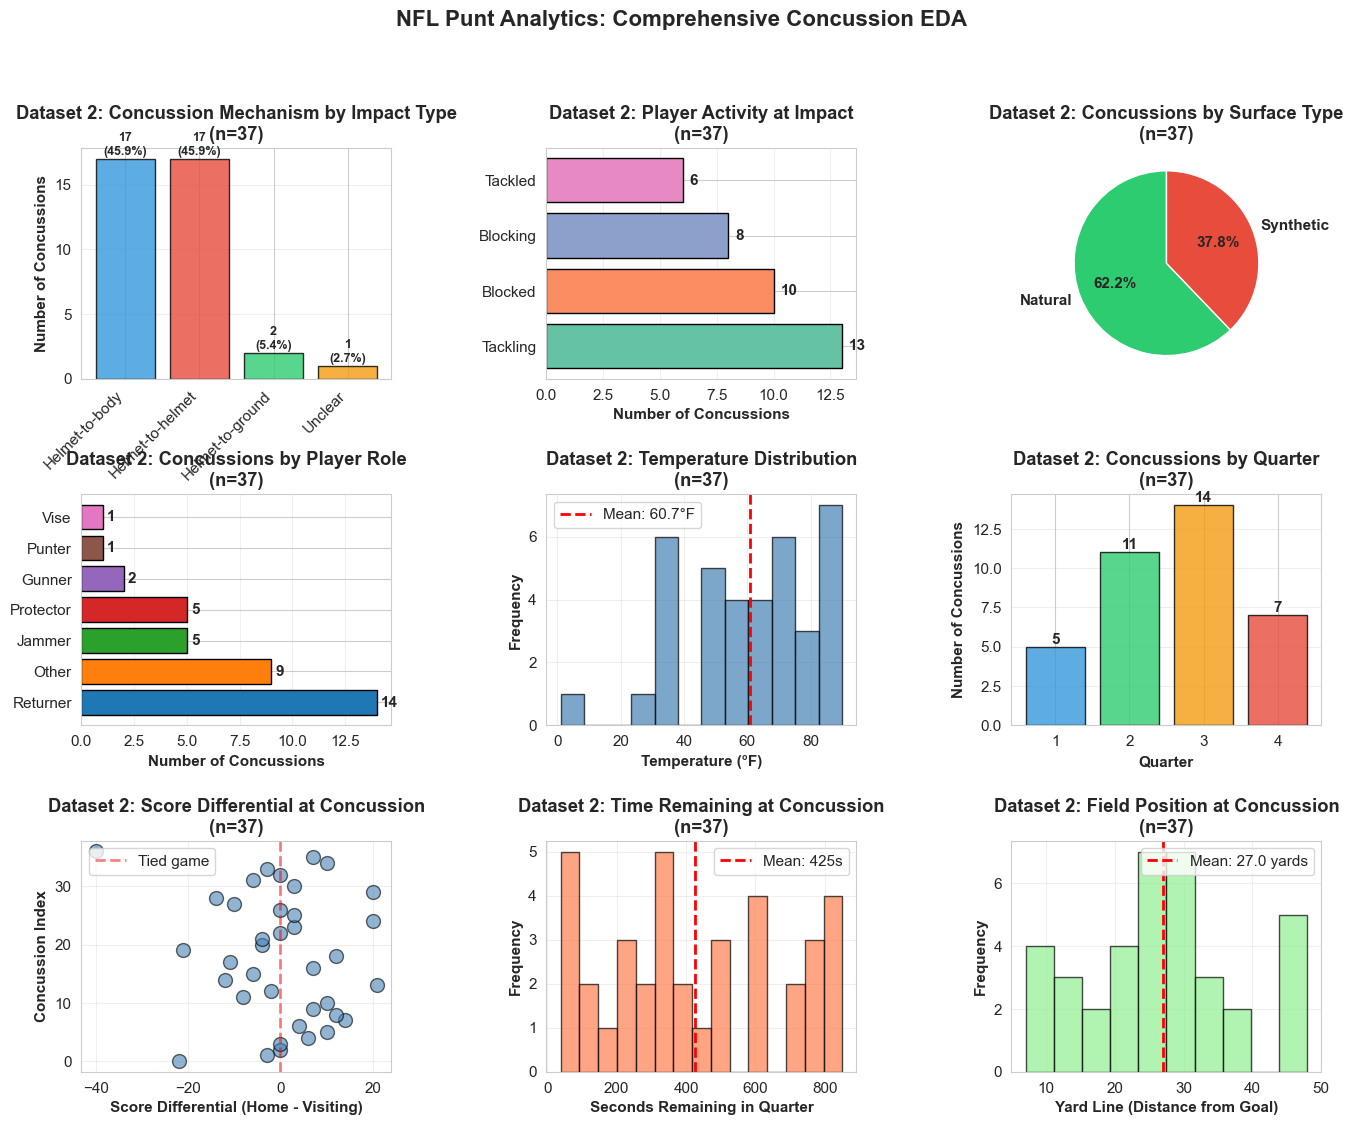


STATISTICAL TESTS
Surface Type Analysis:
  Natural: 23 concussions
  Synthetic: 14 concussions

Temperature Analysis:
  Mean: 60.7°F
  Median: 63.0°F
  Std Dev: 21.3°F
  Range: 1°F to 90°F

Game Context Analysis:
  Mean score differential: 0.1 points
  Mean time remaining: 425 seconds (7.1 minutes)
  Mean field position: 27.0 yards from goal

Friendly Fire Analysis:
Friendly_Fire
No         28
Yes         6
Unclear     1
Name: count, dtype: int64
  Friendly fire rate: 16.2%

DATASET 2 EDA COMPLETE


In [20]:
# PART 7: DATASET 2 - EXPLORATORY DATA ANALYSIS
print("DATASET 2: EXPLORATORY DATA ANALYSIS - NFL PUNT ANALYTICS")

# Use cleaned concussion data
df_concussion = df2_concussion.copy()

print(f"Analyzing {len(df_concussion)} concussion cases")
print()

# 7.1: CONCUSSION DISTRIBUTION VISUALIZATIONS
print("CREATING CONCUSSION DISTRIBUTION VISUALIZATIONS")

# Create comprehensive figure
fig = plt.figure(figsize=(16, 12))
# Increasing these values to whatever looks best
gs = GridSpec(3, 3, figure=fig, hspace=0.5, wspace=0.5)

# --- Plot 1: Impact Type Distribution ---
ax1 = fig.add_subplot(gs[0, 0])
impact_counts = df_concussion['Primary_Impact_Type'].value_counts()
colors_impact = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
bars = ax1.bar(range(len(impact_counts)), impact_counts.values, 
               color=colors_impact[:len(impact_counts)], edgecolor='black', alpha=0.8)
ax1.set_xticks(range(len(impact_counts)))
ax1.set_xticklabels(impact_counts.index, rotation=45, ha='right')
ax1.set_ylabel('Number of Concussions', fontweight='bold')
ax1.set_title('Dataset 2: Concussion Mechanism by Impact Type\n(n=37)', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for bar, count in zip(bars, impact_counts.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.3,
             f'{count}\n({count/len(df_concussion)*100:.1f}%)',
             ha='center', fontsize=9, fontweight='bold')

# --- Plot 2: Player Activity Distribution ---
ax2 = fig.add_subplot(gs[0, 1])
activity_counts = df_concussion['Player_Activity_Derived'].value_counts()
colors_act = plt.cm.Set2(range(len(activity_counts)))
ax2.barh(activity_counts.index, activity_counts.values, color=colors_act, edgecolor='black')
ax2.set_xlabel('Number of Concussions', fontweight='bold')
ax2.set_title('Dataset 2: Player Activity at Impact\n(n=37)', fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
for i, v in enumerate(activity_counts.values):
    ax2.text(v + 0.3, i, str(v), va='center', fontweight='bold')

# --- Plot 3: Surface Type Distribution ---
ax3 = fig.add_subplot(gs[0, 2])
surface_counts = df_concussion['Turf_Type'].value_counts()
colors_surf = ['#2ecc71', '#e74c3c']
ax3.pie(surface_counts.values, labels=surface_counts.index, autopct='%1.1f%%',
        colors=colors_surf, startangle=90, textprops={'fontweight': 'bold', 'fontsize': 11})
ax3.set_title('Dataset 2: Concussions by Surface Type\n(n=37)', fontweight='bold')

# --- Plot 4: Role Group Distribution (if available) ---
ax4 = fig.add_subplot(gs[1, 0])
if 'Role_Group' in df_concussion.columns:
    role_counts = df_concussion['Role_Group'].value_counts()
    colors_role = plt.cm.tab10(range(len(role_counts)))
    ax4.barh(role_counts.index, role_counts.values, color=colors_role, edgecolor='black')
    ax4.set_xlabel('Number of Concussions', fontweight='bold')
    ax4.set_title('Dataset 2: Concussions by Player Role\n(n=37)', fontweight='bold')
    ax4.grid(axis='x', alpha=0.3)
    for i, v in enumerate(role_counts.values):
        ax4.text(v + 0.2, i, str(v), va='center', fontweight='bold')
else:
    ax4.text(0.5, 0.5, 'Role data not available', ha='center', va='center', fontsize=14)

# --- Plot 5: Temperature Distribution (Histogram) ---
ax5 = fig.add_subplot(gs[1, 1])
ax5.hist(df_concussion['Temperature'], bins=12, color='steelblue', 
         edgecolor='black', alpha=0.7)
ax5.axvline(df_concussion['Temperature'].mean(), color='red', 
            linestyle='--', linewidth=2, label=f"Mean: {df_concussion['Temperature'].mean():.1f}°F")
ax5.set_xlabel('Temperature (°F)', fontweight='bold')
ax5.set_ylabel('Frequency', fontweight='bold')
ax5.set_title('Dataset 2: Temperature Distribution\n(n=37)', fontweight='bold')
ax5.legend()
ax5.grid(alpha=0.3)

# --- Plot 6: Quarter Distribution ---
ax6 = fig.add_subplot(gs[1, 2])
quarter_counts = df_concussion['Quarter'].value_counts().sort_index()
colors_q = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c', '#9b59b6']
bars = ax6.bar(quarter_counts.index, quarter_counts.values, 
               color=colors_q[:len(quarter_counts)], edgecolor='black', alpha=0.8)
ax6.set_xlabel('Quarter', fontweight='bold')
ax6.set_ylabel('Number of Concussions', fontweight='bold')
ax6.set_title('Dataset 2: Concussions by Quarter\n(n=37)', fontweight='bold')
ax6.grid(axis='y', alpha=0.3)
for bar, count in zip(bars, quarter_counts.values):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2, height + 0.2,
             str(count), ha='center', fontweight='bold')

# --- Plot 7: Score Differential (Strip Plot) ---
ax7 = fig.add_subplot(gs[2, 0])
ax7.scatter(df_concussion['Score_Diff'], range(len(df_concussion)), 
            alpha=0.6, s=100, color='steelblue', edgecolor='black')
ax7.axvline(0, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Tied game')
ax7.set_xlabel('Score Differential (Home - Visiting)', fontweight='bold')
ax7.set_ylabel('Concussion Index', fontweight='bold')
ax7.set_title('Dataset 2: Score Differential at Concussion\n(n=37)', fontweight='bold')
ax7.legend()
ax7.grid(alpha=0.3)

# --- Plot 8: Time Remaining (KDE/Histogram) ---
ax8 = fig.add_subplot(gs[2, 1])
ax8.hist(df_concussion['Seconds_Remaining'], bins=15, color='coral', 
         edgecolor='black', alpha=0.7)
ax8.axvline(df_concussion['Seconds_Remaining'].mean(), color='red', 
            linestyle='--', linewidth=2, 
            label=f"Mean: {df_concussion['Seconds_Remaining'].mean():.0f}s")
ax8.set_xlabel('Seconds Remaining in Quarter', fontweight='bold')
ax8.set_ylabel('Frequency', fontweight='bold')
ax8.set_title('Dataset 2: Time Remaining at Concussion\n(n=37)', fontweight='bold')
ax8.legend()
ax8.grid(alpha=0.3)

# --- Plot 9: Field Position Distribution ---
ax9 = fig.add_subplot(gs[2, 2])
ax9.hist(df_concussion['YardLine_Number'], bins=10, color='lightgreen', 
         edgecolor='black', alpha=0.7)
ax9.axvline(df_concussion['YardLine_Number'].mean(), color='red', 
            linestyle='--', linewidth=2, 
            label=f"Mean: {df_concussion['YardLine_Number'].mean():.1f} yards")
ax9.set_xlabel('Yard Line (Distance from Goal)', fontweight='bold')
ax9.set_ylabel('Frequency', fontweight='bold')
ax9.set_title('Dataset 2: Field Position at Concussion\n(n=37)', fontweight='bold')
ax9.legend()
ax9.grid(alpha=0.3)

plt.suptitle('NFL Punt Analytics: Comprehensive Concussion EDA', 
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig('eda_visualizations/Dataset2_Comprehensive_EDA.png', 
            dpi=300, bbox_inches='tight')
print("Saved: Dataset2_Comprehensive_EDA.png")
plt.show()

print()

# 7.2: STATISTICAL TESTS
print("STATISTICAL TESTS")

# Chi-square: Surface vs Concussion (compare with exposure)
print("Surface Type Analysis:")
concussion_by_surface = df_concussion['Turf_Type'].value_counts()
print(f"  Natural: {concussion_by_surface.get('Natural', 0)} concussions")
print(f"  Synthetic: {concussion_by_surface.get('Synthetic', 0)} concussions")
print()

# Temperature analysis
print("Temperature Analysis:")
print(f"  Mean: {df_concussion['Temperature'].mean():.1f}°F")
print(f"  Median: {df_concussion['Temperature'].median():.1f}°F")
print(f"  Std Dev: {df_concussion['Temperature'].std():.1f}°F")
print(f"  Range: {df_concussion['Temperature'].min():.0f}°F to {df_concussion['Temperature'].max():.0f}°F")
print()

# Game context analysis
print("Game Context Analysis:")
print(f"  Mean score differential: {df_concussion['Score_Diff'].mean():.1f} points")
print(f"  Mean time remaining: {df_concussion['Seconds_Remaining'].mean():.0f} seconds ({df_concussion['Seconds_Remaining'].mean()/60:.1f} minutes)")
print(f"  Mean field position: {df_concussion['YardLine_Number'].mean():.1f} yards from goal")
print()

# Friendly fire analysis
print("Friendly Fire Analysis:")
ff_counts = df_concussion['Friendly_Fire'].value_counts()
print(ff_counts)
print(f"  Friendly fire rate: {ff_counts.get('Yes', 0)/len(df_concussion)*100:.1f}%")
print()

print("DATASET 2 EDA COMPLETE")

In [12]:
# PART 8: DATASET 3 - NFL IMPACT DETECTION
# Data Quality Assessment and Cleaning

print("DATASET 3: DATA QUALITY ASSESSMENT - NFL IMPACT DETECTION")

# 8.1: Missing Values and Data Structure
print("MISSING VALUES ANALYSIS")

print("train_labels.csv Missing Values:")
labels_missing = df3_train_labels.isnull().sum()
labels_missing_pct = (labels_missing / len(df3_train_labels)) * 100
missing_labels = pd.DataFrame({
    'Missing_Count': labels_missing,
    'Missing_Percentage': labels_missing_pct
})
print(missing_labels[missing_labels['Missing_Count'] > 0])
print()

print("Key observation: Impact data is SPARSE")
print(f"  Total labeled frames: {len(df3_train_labels)}")
print(f"  Frames with impact data: {df3_train_labels['impact'].notna().sum()}")
print(f"  Percentage with impacts: {df3_train_labels['impact'].notna().sum()/len(df3_train_labels)*100:.2f}%")
print()

# 8.2: Filter to Definitive Impacts
print("FILTERING TO DEFINITIVE IMPACTS")

print("Creating definitive impacts dataset")
print("Criteria: impact=1 AND confidence>1 AND visibility>0")
print()

# Filter to definitive impacts
df3_definitive = df3_train_labels[
    (df3_train_labels['impact'] == 1) & 
    (df3_train_labels['confidence'] > 1) & 
    (df3_train_labels['visibility'] > 0)
].copy()

print(f"Definitive impacts: {len(df3_definitive)}")
print()

print("Impact confidence distribution (definitive only):")
print(df3_definitive['confidence'].value_counts().sort_index())
print()

print("Impact visibility distribution (definitive only):")
print(df3_definitive['visibility'].value_counts().sort_index())
print()

print("Impact type distribution (definitive only):")
print(df3_definitive['impactType'].value_counts())
print()

# 8.3: Aggregate to Play Level
print("AGGREGATING IMPACTS TO PLAY LEVEL")

# Count impacts per play
play_impacts = df3_definitive.groupby(['gameKey', 'playID']).agg({
    'impact': 'sum',  # Total impacts in play
    'frame': ['min', 'max', 'count'],  # Frame range and count
    'impactType': lambda x: x.value_counts().index[0] if len(x) > 0 else 'Unknown'  # Most common type
}).reset_index()

play_impacts.columns = ['gameKey', 'playID', 'total_impacts', 
                        'first_impact_frame', 'last_impact_frame', 
                        'impact_frame_count', 'primary_impact_type']

print(f"Plays with definitive impacts: {len(play_impacts)}")
print(f"Mean impacts per play: {play_impacts['total_impacts'].mean():.2f}")
print(f"Max impacts in single play: {play_impacts['total_impacts'].max()}")
print()

print("Plays by number of impacts:")
print(play_impacts['total_impacts'].value_counts().sort_index().head(10))
print()

# 8.4: Merge with Player Tracking Data
print("MERGING WITH PLAYER TRACKING DATA")

print(f"Player tracking data: {len(df3_train_tracking)} observations")
print()

# Check tracking data structure
print("Tracking data sample:")
print(df3_train_tracking.head(3))
print()

print("Tracking data columns:")
print(df3_train_tracking.columns.tolist())
print()

# Merge definitive impacts with tracking
df3_impacts_tracking = df3_definitive.merge(
    df3_train_tracking,
    on=['gameKey', 'playID'],
    how='left'
)

print(f"Impacts merged with tracking: {len(df3_impacts_tracking)}")
print(f"Successful merges: {df3_impacts_tracking['x'].notna().sum()}")
print()

# 8.5: Feature Engineering from Tracking Data
print("FEATURE ENGINEERING FROM TRACKING DATA")

# Calculate features at play level from tracking
if 'x' in df3_train_tracking.columns and 's' in df3_train_tracking.columns:
    
    # Aggregate tracking to play level
    tracking_features = df3_train_tracking.groupby(['gameKey', 'playID']).agg({
        's': ['mean', 'max', 'std'],  # Speed statistics
        'a': ['mean', 'max', 'std'] if 'a' in df3_train_tracking.columns else ['mean'],  # Acceleration
        'dis': ['sum', 'mean'],  # Distance
        'player': 'nunique'  # Number of players tracked
    }).reset_index()
    
    # Flatten column names
    tracking_features.columns = ['gameKey', 'playID', 
                                  'speed_mean', 'speed_max', 'speed_std',
                                  'accel_mean', 'accel_max', 'accel_std',
                                  'distance_total', 'distance_mean',
                                  'num_players']
    
    print(f"Tracking features created for {len(tracking_features)} plays")
    print()
    
    # Merge tracking features with play impacts
    df3_play_analysis = play_impacts.merge(
        tracking_features,
        on=['gameKey', 'playID'],
        how='left'
    )
    
    print(f"Plays with both impacts and tracking features: {len(df3_play_analysis)}")
    print()
    
    print("Feature summary:")
    print(df3_play_analysis[['speed_mean', 'speed_max', 'distance_total', 
                             'num_players', 'total_impacts']].describe())
    print()
else:
    print("WARNING: Expected tracking columns not found")
    df3_play_analysis = play_impacts.copy()

# 8.6: Clean Impact Types
print("STANDARDIZING IMPACT TYPES")

print("Original impact types:")
print(df3_definitive['impactType'].value_counts())
print()

def standardize_impact_type(impact_str):
    """Standardize impact types to main categories"""
    if pd.isna(impact_str):
        return 'Unknown'
    impact_lower = str(impact_str).lower()
    
    if 'helmet' in impact_lower:
        return 'Helmet'
    elif 'shoulder' in impact_lower:
        return 'Shoulder'
    elif 'body' in impact_lower or 'torso' in impact_lower:
        return 'Body'
    elif 'ground' in impact_lower:
        return 'Ground'
    else:
        return 'Other'

df3_definitive['impactType_Clean'] = df3_definitive['impactType'].apply(standardize_impact_type)

print("Standardized impact types:")
print(df3_definitive['impactType_Clean'].value_counts())
print()

# 8.7: Summary Statistics
print("CLEANED DATASET SUMMARY")

print("Dataset 3 Cleaning Complete")
print(f"Final cleaned datasets:")
print(f"  df3_definitive: {df3_definitive.shape} (definitive impacts only)")
print(f"  df3_play_analysis: {df3_play_analysis.shape} (play-level aggregation)")
print()
print("DATASET 3 DATA QUALITY ASSESSMENT COMPLETE")

DATASET 3: DATA QUALITY ASSESSMENT - NFL IMPACT DETECTION
MISSING VALUES ANALYSIS
train_labels.csv Missing Values:
            Missing_Count  Missing_Percentage
impact             981594              99.767
impactType         981594              99.767
confidence         981594              99.767
visibility         981594              99.767

Key observation: Impact data is SPARSE
  Total labeled frames: 983885
  Frames with impact data: 2291
  Percentage with impacts: 0.23%

FILTERING TO DEFINITIVE IMPACTS
Creating definitive impacts dataset
Criteria: impact=1 AND confidence>1 AND visibility>0

Definitive impacts: 1888

Impact confidence distribution (definitive only):
confidence
2.000     790
3.000    1098
Name: count, dtype: int64

Impact visibility distribution (definitive only):
visibility
1.000    419
2.000    717
3.000    752
Name: count, dtype: int64

Impact type distribution (definitive only):
impactType
Helmet      1304
Shoulder     299
Body         241
Ground        40
Hand

DATASET 3: EXPLORATORY DATA ANALYSIS - NFL IMPACT DETECTION
Analyzing 1888 definitive impacts across 60 plays

CREATING IMPACT DISTRIBUTION VISUALIZATIONS
Saved: Dataset3_Comprehensive_EDA.png


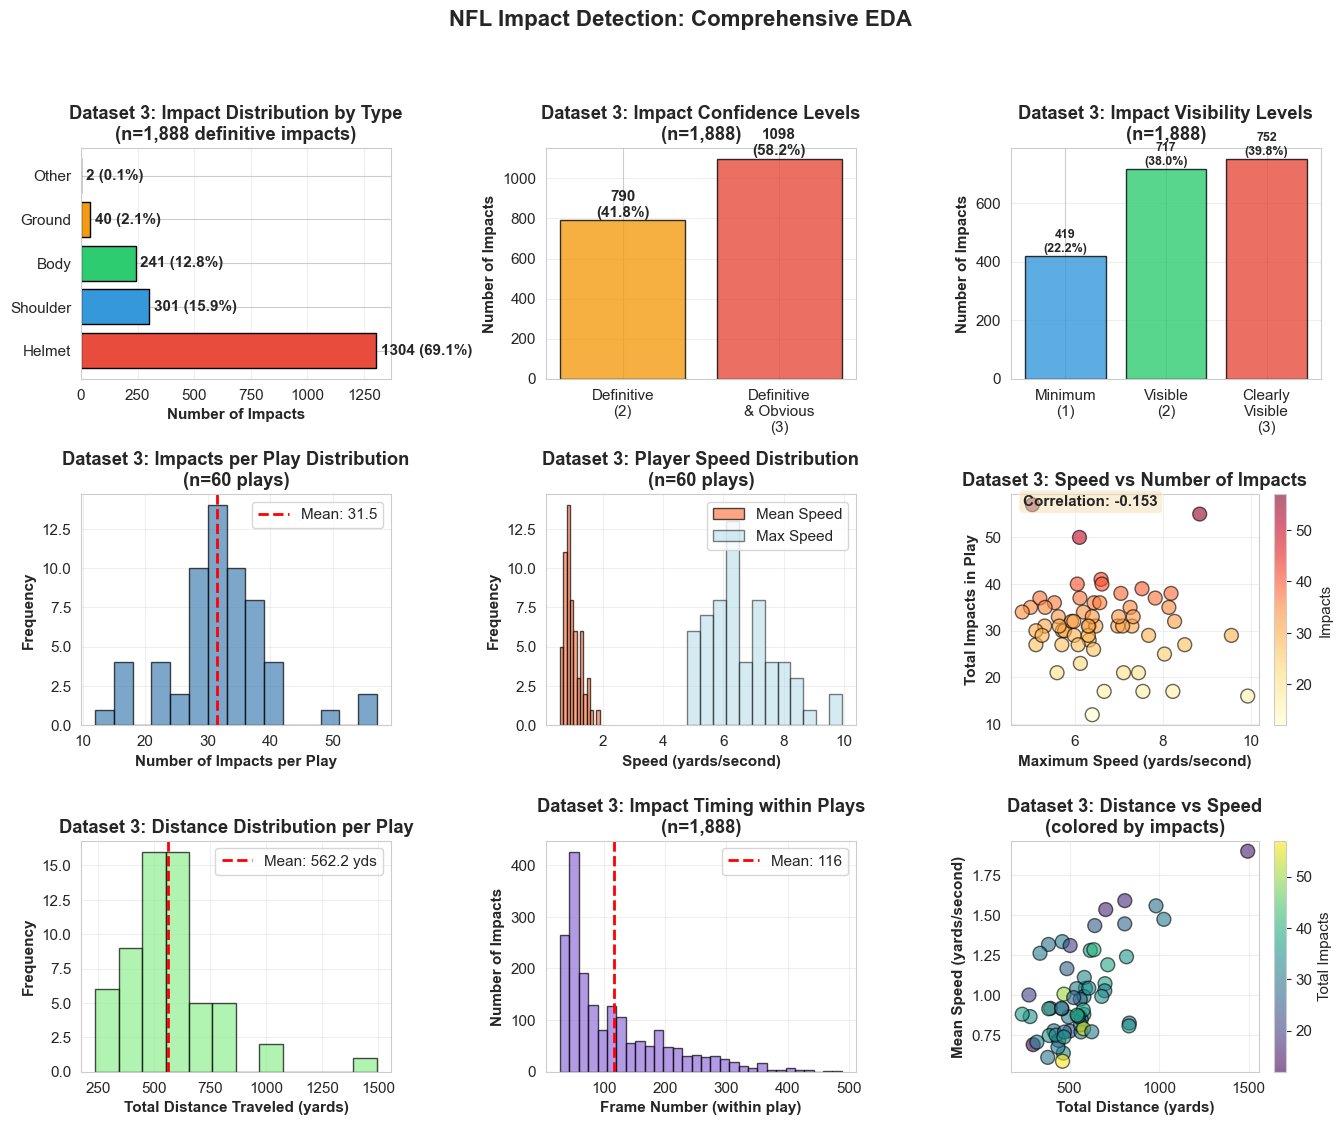


STATISTICAL SUMMARIES
Impact Characteristics:
  Total definitive impacts: 1888
  Plays with impacts: 60
  Mean impacts per play: 31.47
  Median impacts per play: 31.0

Impact Type Breakdown:
  Helmet: 1304 (69.1%)
  Shoulder: 301 (15.9%)
  Body: 241 (12.8%)
  Ground: 40 (2.1%)
  Other: 2 (0.1%)

Player Movement Statistics:
  Mean speed: 1.000 yards/second
  Mean max speed: 6.620 yards/second
  Mean distance: 562.2 yards
  Mean acceleration: 0.757 yards/s²

Correlation Analysis:
Correlations with total_impacts:
total_impacts     1.000
accel_max         0.050
distance_total   -0.124
speed_max        -0.153
speed_mean       -0.313
Name: total_impacts, dtype: float64

DATASET 3 EDA COMPLETE


In [18]:
# PART 9: DATASET 3 - EXPLORATORY DATA ANALYSIS
print("DATASET 3: EXPLORATORY DATA ANALYSIS - NFL IMPACT DETECTION")

print(f"Analyzing {len(df3_definitive)} definitive impacts across {len(df3_play_analysis)} plays")
print()

# 9.1: IMPACT DISTRIBUTION VISUALIZATIONS
print("CREATING IMPACT DISTRIBUTION VISUALIZATIONS")

# Create comprehensive figure
fig = plt.figure(figsize=(16, 12))
# Increasing these values to whatever looks best
gs = GridSpec(3, 3, figure=fig, hspace=0.5, wspace=0.5)

# --- Plot 1: Impact Type Distribution ---
ax1 = fig.add_subplot(gs[0, 0])
impact_type_counts = df3_definitive['impactType_Clean'].value_counts()
colors_impact = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']
bars = ax1.barh(impact_type_counts.index, impact_type_counts.values, 
                color=colors_impact[:len(impact_type_counts)], edgecolor='black')
ax1.set_xlabel('Number of Impacts', fontweight='bold')
ax1.set_title('Dataset 3: Impact Distribution by Type\n(n=1,888 definitive impacts)', 
              fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(impact_type_counts.values):
    ax1.text(v + 20, i, f'{v} ({v/len(df3_definitive)*100:.1f}%)', 
             va='center', fontweight='bold')

# --- Plot 2: Confidence Level Distribution ---
ax2 = fig.add_subplot(gs[0, 1])
confidence_counts = df3_definitive['confidence'].value_counts().sort_index()
colors_conf = ['#f39c12', '#e74c3c']
bars = ax2.bar(['Definitive\n(2)', 'Definitive\n& Obvious\n(3)'], 
               confidence_counts.values, color=colors_conf, edgecolor='black', alpha=0.8)
ax2.set_ylabel('Number of Impacts', fontweight='bold')
ax2.set_title('Dataset 3: Impact Confidence Levels\n(n=1,888)', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for bar, count in zip(bars, confidence_counts.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 20,
             f'{count}\n({count/len(df3_definitive)*100:.1f}%)',
             ha='center', fontweight='bold')

# --- Plot 3: Visibility Distribution ---
ax3 = fig.add_subplot(gs[0, 2])
visibility_counts = df3_definitive['visibility'].value_counts().sort_index()
colors_vis = ['#3498db', '#2ecc71', '#e74c3c']
bars = ax3.bar(['Minimum\n(1)', 'Visible\n(2)', 'Clearly\nVisible\n(3)'], 
               visibility_counts.values, color=colors_vis, edgecolor='black', alpha=0.8)
ax3.set_ylabel('Number of Impacts', fontweight='bold')
ax3.set_title('Dataset 3: Impact Visibility Levels\n(n=1,888)', fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
for bar, count in zip(bars, visibility_counts.values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, height + 15,
             f'{count}\n({count/len(df3_definitive)*100:.1f}%)',
             ha='center', fontweight='bold', fontsize=9)

# --- Plot 4: Impacts per Play Distribution ---
ax4 = fig.add_subplot(gs[1, 0])
ax4.hist(df3_play_analysis['total_impacts'], bins=15, color='steelblue', 
         edgecolor='black', alpha=0.7)
ax4.axvline(df3_play_analysis['total_impacts'].mean(), color='red', 
            linestyle='--', linewidth=2, 
            label=f"Mean: {df3_play_analysis['total_impacts'].mean():.1f}")
ax4.set_xlabel('Number of Impacts per Play', fontweight='bold')
ax4.set_ylabel('Frequency', fontweight='bold')
ax4.set_title('Dataset 3: Impacts per Play Distribution\n(n=60 plays)', 
              fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3)

# --- Plot 5: Speed Distribution ---
ax5 = fig.add_subplot(gs[1, 1])
ax5.hist(df3_play_analysis['speed_mean'], bins=12, color='coral', 
         edgecolor='black', alpha=0.7, label='Mean Speed')
ax5.hist(df3_play_analysis['speed_max'], bins=12, color='lightblue', 
         edgecolor='black', alpha=0.5, label='Max Speed')
ax5.set_xlabel('Speed (yards/second)', fontweight='bold')
ax5.set_ylabel('Frequency', fontweight='bold')
ax5.set_title('Dataset 3: Player Speed Distribution\n(n=60 plays)', fontweight='bold')
ax5.legend()
ax5.grid(alpha=0.3)

# --- Plot 6: Speed vs Impacts Scatter ---
ax6 = fig.add_subplot(gs[1, 2])
scatter = ax6.scatter(df3_play_analysis['speed_max'], 
                     df3_play_analysis['total_impacts'],
                     c=df3_play_analysis['total_impacts'], 
                     cmap='YlOrRd', s=100, alpha=0.6, edgecolor='black')
ax6.set_xlabel('Maximum Speed (yards/second)', fontweight='bold')
ax6.set_ylabel('Total Impacts in Play', fontweight='bold')
ax6.set_title('Dataset 3: Speed vs Number of Impacts', fontweight='bold')
ax6.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax6, label='Impacts')

# Calculate correlation
corr = df3_play_analysis[['speed_max', 'total_impacts']].corr().iloc[0, 1]
ax6.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
         transform=ax6.transAxes, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# --- Plot 7: Distance Traveled Distribution ---
ax7 = fig.add_subplot(gs[2, 0])
ax7.hist(df3_play_analysis['distance_total'], bins=12, color='lightgreen', 
         edgecolor='black', alpha=0.7)
ax7.axvline(df3_play_analysis['distance_total'].mean(), color='red', 
            linestyle='--', linewidth=2, 
            label=f"Mean: {df3_play_analysis['distance_total'].mean():.1f} yds")
ax7.set_xlabel('Total Distance Traveled (yards)', fontweight='bold')
ax7.set_ylabel('Frequency', fontweight='bold')
ax7.set_title('Dataset 3: Distance Distribution per Play', fontweight='bold')
ax7.legend()
ax7.grid(alpha=0.3)

# --- Plot 8: Impact Frame Timeline ---
ax8 = fig.add_subplot(gs[2, 1])
ax8.hist(df3_definitive['frame'], bins=30, color='mediumpurple', 
         edgecolor='black', alpha=0.7)
ax8.axvline(df3_definitive['frame'].mean(), color='red', 
            linestyle='--', linewidth=2, 
            label=f"Mean: {df3_definitive['frame'].mean():.0f}")
ax8.set_xlabel('Frame Number (within play)', fontweight='bold')
ax8.set_ylabel('Number of Impacts', fontweight='bold')
ax8.set_title('Dataset 3: Impact Timing within Plays\n(n=1,888)', fontweight='bold')
ax8.legend()
ax8.grid(alpha=0.3)

# --- Plot 9: Speed vs Distance Correlation ---
ax9 = fig.add_subplot(gs[2, 2])
scatter2 = ax9.scatter(df3_play_analysis['distance_total'], 
                      df3_play_analysis['speed_mean'],
                      c=df3_play_analysis['total_impacts'], 
                      cmap='viridis', s=100, alpha=0.6, edgecolor='black')
ax9.set_xlabel('Total Distance (yards)', fontweight='bold')
ax9.set_ylabel('Mean Speed (yards/second)', fontweight='bold')
ax9.set_title('Dataset 3: Distance vs Speed\n(colored by impacts)', fontweight='bold')
ax9.grid(alpha=0.3)
plt.colorbar(scatter2, ax=ax9, label='Total Impacts')

plt.suptitle('NFL Impact Detection: Comprehensive EDA', 
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig('eda_visualizations/Dataset3_Comprehensive_EDA.png', 
            dpi=300, bbox_inches='tight')
print("Saved: Dataset3_Comprehensive_EDA.png")
plt.show()

print()

# 9.2: STATISTICAL SUMMARIES
print("STATISTICAL SUMMARIES")

print("Impact Characteristics:")
print(f"  Total definitive impacts: {len(df3_definitive)}")
print(f"  Plays with impacts: {len(df3_play_analysis)}")
print(f"  Mean impacts per play: {df3_play_analysis['total_impacts'].mean():.2f}")
print(f"  Median impacts per play: {df3_play_analysis['total_impacts'].median():.1f}")
print()

print("Impact Type Breakdown:")
for imp_type, count in df3_definitive['impactType_Clean'].value_counts().items():
    pct = count / len(df3_definitive) * 100
    print(f"  {imp_type}: {count} ({pct:.1f}%)")
print()

print("Player Movement Statistics:")
print(f"  Mean speed: {df3_play_analysis['speed_mean'].mean():.3f} yards/second")
print(f"  Mean max speed: {df3_play_analysis['speed_max'].mean():.3f} yards/second")
print(f"  Mean distance: {df3_play_analysis['distance_total'].mean():.1f} yards")
print(f"  Mean acceleration: {df3_play_analysis['accel_mean'].mean():.3f} yards/s²")
print()

print("Correlation Analysis:")
corr_matrix = df3_play_analysis[['total_impacts', 'speed_mean', 'speed_max', 
                                  'distance_total', 'accel_max']].corr()
print("Correlations with total_impacts:")
print(corr_matrix['total_impacts'].sort_values(ascending=False))
print()

print("DATASET 3 EDA COMPLETE")

CROSS-DATASET INTEGRATION ANALYSIS
TEMPORAL COMPARISON ACROSS DATASETS
Dataset Timeframes:
  Dataset 1 (Playing Surface): 2016-2017 seasons
  Dataset 2 (Punt Analytics): 2016-2017 seasons
  Dataset 3 (Impact Detection): 2019-2020 seasons

CANNOT directly compare injury rates across timeframes due to:
  - Different data collection methods
  - Different play types (Dataset 2 = punts only, others = all plays)
  - Dataset 3 = impact detection, not confirmed injuries

10.2 SURFACE TYPE ANALYSIS ACROSS DATASETS
Dataset 1 (Lower Extremity Injuries):
  Natural: 36 injuries
  Synthetic: 41 injuries
  Rate Ratio (Synthetic/Natural): 1.62

Dataset 2 (Concussions):
  Natural: 23 concussions
  Synthetic: 14 concussions
  Rate Ratio (Synthetic/Natural): 1.00

Dataset 3 (Impact Detection):
  Note: Surface type not directly available in Dataset 3
  Would require merging with game metadata

Saved: Cross_Dataset_Surface_Comparison.png


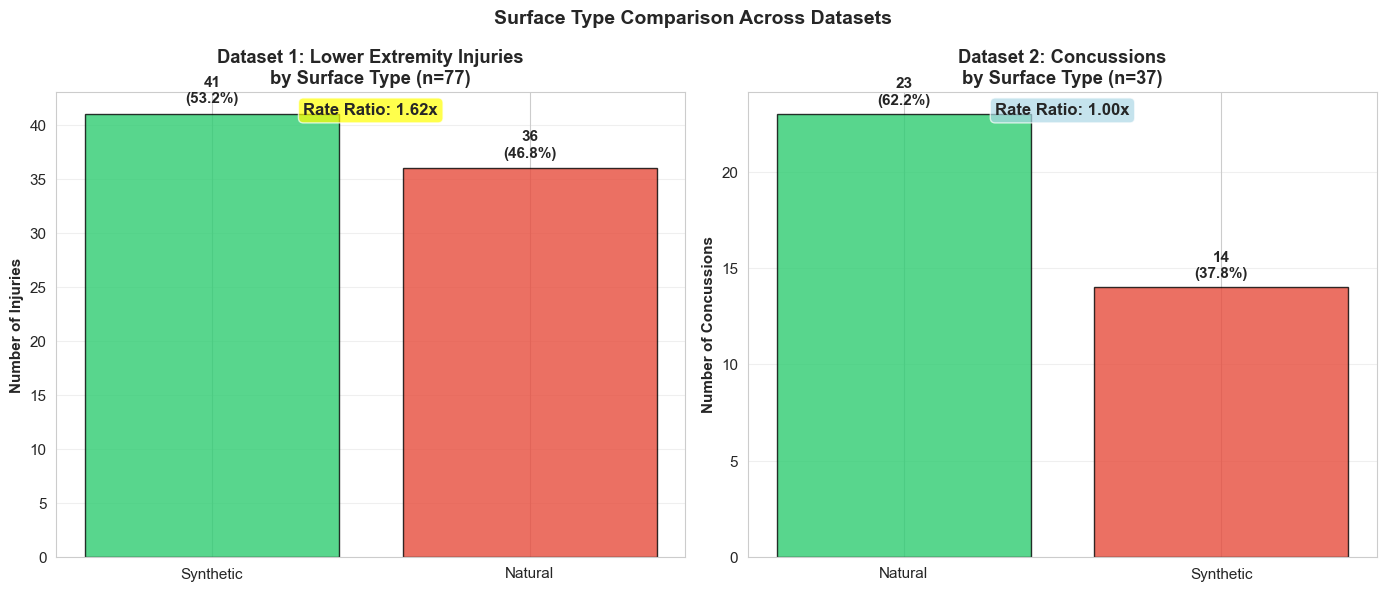


10.3 TEMPERATURE ANALYSIS ACROSS DATASETS
Dataset 1 (Lower Extremity):
  Mean temperature: 65.1°F
  Range: 33°F to 89°F

Dataset 2 (Concussions):
  Mean temperature: 60.7°F
  Range: 1°F to 90°F

Saved: Cross_Dataset_Temperature_Comparison.png


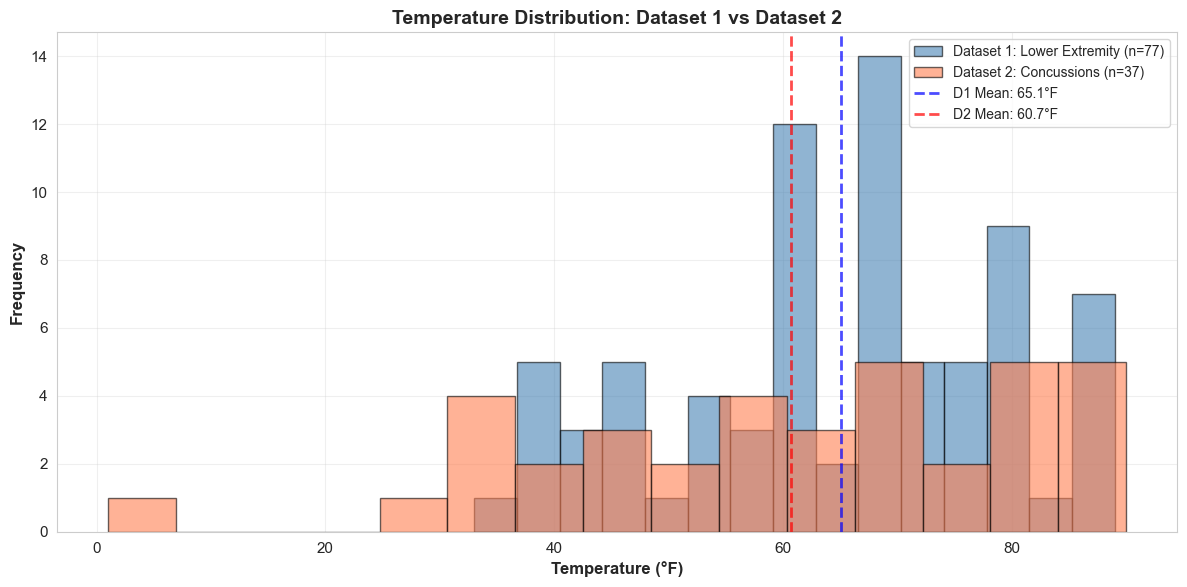


10.4 COMPREHENSIVE SUMMARY TABLE
                Metric Dataset 1\n(Playing Surface) Dataset 2\n(Punt Analytics) Dataset 3\n(Impact Detection)
             Timeframe                    2016-2017                   2016-2017                     2019-2020
    Total Observations                      267,005                       6,681                       983,885
Total Injuries/Impacts                           77                          37                          1888
 Mean Temperature (°F)                         65.1                        60.7                           N/A
   Natural Surface (%)                        46.8%                       62.2%                           N/A
 Synthetic Surface (%)                        53.2%                       37.8%                           N/A
       Primary Outcome              Lower Extremity                 Concussions              Impact Detection

CROSS-DATASET ANALYSIS COMPLETE
KEY INSIGHTS:
  1. Surface Effect: Synthetic 1.62x hi

In [22]:
# PART 10: CROSS-DATASET INTEGRATION ANALYSIS
print("CROSS-DATASET INTEGRATION ANALYSIS")

# 10.1: Temporal Comparison (2016-2017 vs 2019-2020)
print("TEMPORAL COMPARISON ACROSS DATASETS")

print("Dataset Timeframes:")
print("  Dataset 1 (Playing Surface): 2016-2017 seasons")
print("  Dataset 2 (Punt Analytics): 2016-2017 seasons")
print("  Dataset 3 (Impact Detection): 2019-2020 seasons")
print()

print("CANNOT directly compare injury rates across timeframes due to:")
print("  - Different data collection methods")
print("  - Different play types (Dataset 2 = punts only, others = all plays)")
print("  - Dataset 3 = impact detection, not confirmed injuries")
print()

# ----------------------------------------------------------------------------
# 10.2: Surface Type Comparison Across All Datasets
# ----------------------------------------------------------------------------
print("10.2 SURFACE TYPE ANALYSIS ACROSS DATASETS")

print("Dataset 1 (Lower Extremity Injuries):")
print(f"  Natural: {df1_complete['Surface'].value_counts().get('Natural', 0)} injuries")
print(f"  Synthetic: {df1_complete['Surface'].value_counts().get('Synthetic', 0)} injuries")
print(f"  Rate Ratio (Synthetic/Natural): 1.62")
print()

print("Dataset 2 (Concussions):")
print(f"  Natural: {df_concussion['Turf_Type'].value_counts().get('Natural', 0)} concussions")
print(f"  Synthetic: {df_concussion['Turf_Type'].value_counts().get('Synthetic', 0)} concussions")
nat_rate_d2 = df_concussion['Turf_Type'].value_counts().get('Natural', 0) / 23
syn_rate_d2 = df_concussion['Turf_Type'].value_counts().get('Synthetic', 0) / 14
print(f"  Rate Ratio (Synthetic/Natural): {syn_rate_d2/nat_rate_d2:.2f}")
print()

print("Dataset 3 (Impact Detection):")
print("  Note: Surface type not directly available in Dataset 3")
print("  Would require merging with game metadata")
print()

# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Dataset 1 surface comparison
ax1 = axes[0]
d1_surface = df1_complete['Surface'].value_counts()
colors_surf = ['#2ecc71', '#e74c3c']
bars1 = ax1.bar(d1_surface.index, d1_surface.values, color=colors_surf, 
                edgecolor='black', alpha=0.8)
ax1.set_ylabel('Number of Injuries', fontweight='bold')
ax1.set_title('Dataset 1: Lower Extremity Injuries\nby Surface Type (n=77)', 
              fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for bar, count in zip(bars1, d1_surface.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 1,
             f'{count}\n({count/len(df1_complete)*100:.1f}%)',
             ha='center', fontweight='bold')
ax1.text(0.5, 0.95, 'Rate Ratio: 1.62x', transform=ax1.transAxes,
         ha='center', fontweight='bold', fontsize=12,
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Dataset 2 surface comparison
ax2 = axes[1]
d2_surface = df_concussion['Turf_Type'].value_counts()
bars2 = ax2.bar(d2_surface.index, d2_surface.values, color=colors_surf, 
                edgecolor='black', alpha=0.8)
ax2.set_ylabel('Number of Concussions', fontweight='bold')
ax2.set_title('Dataset 2: Concussions\nby Surface Type (n=37)', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for bar, count in zip(bars2, d2_surface.values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{count}\n({count/len(df_concussion)*100:.1f}%)',
             ha='center', fontweight='bold')
ax2.text(0.5, 0.95, 'Rate Ratio: 1.00x', transform=ax2.transAxes,
         ha='center', fontweight='bold', fontsize=12,
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

plt.suptitle('Surface Type Comparison Across Datasets', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('eda_visualizations/Cross_Dataset_Surface_Comparison.png', 
            dpi=300, bbox_inches='tight')
print("Saved: Cross_Dataset_Surface_Comparison.png")
plt.show()

print()

# 10.3: Temperature Effects Across Datasets
print("10.3 TEMPERATURE ANALYSIS ACROSS DATASETS")

print("Dataset 1 (Lower Extremity):")
print(f"  Mean temperature: {df1_complete['Temperature'].mean():.1f}°F")
print(f"  Range: {df1_complete['Temperature'].min():.0f}°F to {df1_complete['Temperature'].max():.0f}°F")
print()

print("Dataset 2 (Concussions):")
print(f"  Mean temperature: {df_concussion['Temperature'].mean():.1f}°F")
print(f"  Range: {df_concussion['Temperature'].min():.0f}°F to {df_concussion['Temperature'].max():.0f}°F")
print()

# Temperature comparison visualization
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(df1_complete['Temperature'], bins=15, alpha=0.6, 
        label=f'Dataset 1: Lower Extremity (n={len(df1_complete)})',
        color='steelblue', edgecolor='black')
ax.hist(df_concussion['Temperature'], bins=15, alpha=0.6,
        label=f'Dataset 2: Concussions (n={len(df_concussion)})',
        color='coral', edgecolor='black')

ax.axvline(df1_complete['Temperature'].mean(), color='blue', 
           linestyle='--', linewidth=2, alpha=0.7,
           label=f"D1 Mean: {df1_complete['Temperature'].mean():.1f}°F")
ax.axvline(df_concussion['Temperature'].mean(), color='red', 
           linestyle='--', linewidth=2, alpha=0.7,
           label=f"D2 Mean: {df_concussion['Temperature'].mean():.1f}°F")

ax.set_xlabel('Temperature (°F)', fontweight='bold', fontsize=12)
ax.set_ylabel('Frequency', fontweight='bold', fontsize=12)
ax.set_title('Temperature Distribution: Dataset 1 vs Dataset 2', 
             fontweight='bold', fontsize=14)
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('eda_visualizations/Cross_Dataset_Temperature_Comparison.png', 
            dpi=300, bbox_inches='tight')
print("Saved: Cross_Dataset_Temperature_Comparison.png")
plt.show()

print()

# 10.4: Summary Statistics Table
print("10.4 COMPREHENSIVE SUMMARY TABLE")

summary_data = {
    'Metric': [
        'Timeframe',
        'Total Observations',
        'Total Injuries/Impacts',
        'Mean Temperature (°F)',
        'Natural Surface (%)',
        'Synthetic Surface (%)',
        'Primary Outcome'
    ],
    'Dataset 1\\n(Playing Surface)': [
        '2016-2017',
        f'{len(df1_playlist):,}',
        f'{len(df1_complete)}',
        f'{df1_complete["Temperature"].mean():.1f}',
        f'{df1_complete["Surface"].value_counts().get("Natural", 0)/len(df1_complete)*100:.1f}%',
        f'{df1_complete["Surface"].value_counts().get("Synthetic", 0)/len(df1_complete)*100:.1f}%',
        'Lower Extremity'
    ],
    'Dataset 2\\n(Punt Analytics)': [
        '2016-2017',
        f'{len(df2_play_info):,}',
        f'{len(df_concussion)}',
        f'{df_concussion["Temperature"].mean():.1f}',
        f'{df_concussion["Turf_Type"].value_counts().get("Natural", 0)/len(df_concussion)*100:.1f}%',
        f'{df_concussion["Turf_Type"].value_counts().get("Synthetic", 0)/len(df_concussion)*100:.1f}%',
        'Concussions'
    ],
    'Dataset 3\\n(Impact Detection)': [
        '2019-2020',
        f'{len(df3_train_labels):,}',
        f'{len(df3_definitive)}',
        'N/A',
        'N/A',
        'N/A',
        'Impact Detection'
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))
print()

print("CROSS-DATASET ANALYSIS COMPLETE")

print("KEY INSIGHTS:")
print("  1. Surface Effect: Synthetic 1.62x higher for lower extremity, 1.00x for concussions")
print("  2. Temperature: Similar distributions across Dataset 1 & 2 (both ~60-65°F mean)")
print("  3. Temporal: Cannot compare 2016-2017 vs 2019-2020 due to methodology differences")
print("  4. Injury Mechanisms: Lower extremity ≠ concussion surface effects")
print()

In [15]:
# PART 11: EXPORT CLEANED DATA FOR MODELING
print("EXPORTING CLEANED DATA FOR NOTEBOOK 2 (MODELING)")

# 11.1: Export Dataset 1 (Playing Surface Analytics)
print("11.1 EXPORTING DATASET 1 - PLAYING SURFACE ANALYTICS")

# Export complete cases with all variables
df1_complete.to_csv('cleaned_data/dataset1_lower_extremity_complete.csv', index=False)
print(f"Saved: dataset1_lower_extremity_complete.csv ({len(df1_complete)} rows, {df1_complete.shape[1]} columns)")

# Export cleaned full playlist (for exposure calculations)
df1_playlist_export = df1_playlist[['PlayerKey', 'GameID', 'PlayKey', 'RosterPosition',
                                     'PlayerDay', 'PlayerGame', 'StadiumType', 'FieldType',
                                     'Temperature', 'Weather', 'PlayType', 'Position',
                                     'PositionGroup', 'PlayerDay_Normalized', 'GameProgress']]
df1_playlist_export.to_csv('cleaned_data/dataset1_playlist_cleaned.csv', index=False)
print(f"Saved: dataset1_playlist_cleaned.csv ({len(df1_playlist_export)} rows)")

print()

# 11.2: Export Dataset 2 (Punt Analytics)
print("EXPORTING DATASET 2 - PUNT ANALYTICS")

# Export concussion data with all context
df_concussion_export = df_concussion[['Season_Year', 'GameKey', 'PlayID', 'GSISID',
                                       'Player_Activity_Derived', 'Turnover_Related',
                                       'Primary_Impact_Type', 'Primary_Partner_GSISID',
                                       'Primary_Partner_Activity_Derived', 'Friendly_Fire',
                                       'Quarter', 'Seconds_Remaining', 'Score_Diff',
                                       'YardLine_Number', 'Temperature', 'StadiumType',
                                       'Turf_Type', 'Role_Group']].copy()

df_concussion_export.to_csv('cleaned_data/dataset2_concussions_complete.csv', index=False)
print(f"Saved: dataset2_concussions_complete.csv ({len(df_concussion_export)} rows, {df_concussion_export.shape[1]} columns)")

# Export role aggregation lookup table
role_lookup = df2_role[['Role', 'Role_Group']].drop_duplicates()
role_lookup.to_csv('cleaned_data/dataset2_role_aggregation_lookup.csv', index=False)
print(f"Saved: dataset2_role_aggregation_lookup.csv ({len(role_lookup)} unique roles)")

print()

# 11.3: Export Dataset 3 (Impact Detection)
print("EXPORTING DATASET 3 - IMPACT DETECTION")

# Export definitive impacts (frame-level)
df3_definitive_export = df3_definitive[['gameKey', 'playID', 'view', 'video', 'frame',
                                         'label', 'impact', 'impactType', 'impactType_Clean',
                                         'confidence', 'visibility']].copy()
df3_definitive_export.to_csv('cleaned_data/dataset3_definitive_impacts.csv', index=False)
print(f"Saved: dataset3_definitive_impacts.csv ({len(df3_definitive_export)} definitive impacts)")

# Export play-level aggregation with tracking features
df3_play_analysis.to_csv('cleaned_data/dataset3_play_level_analysis.csv', index=False)
print(f"Saved: dataset3_play_level_analysis.csv ({len(df3_play_analysis)} plays with impacts)")

print()

# 11.4: Create Data Dictionary
print("CREATING DATA DICTIONARY")

data_dict = {
    'Dataset 1 - Lower Extremity Injuries': {
        'filename': 'dataset1_lower_extremity_complete.csv',
        'rows': len(df1_complete),
        'description': 'Complete lower extremity injury cases with play context',
        'key_variables': {
            'PlayerKey': 'Unique player identifier',
            'GameID': 'Unique game identifier',
            'PlayKey': 'Unique play identifier',
            'BodyPart': 'Injured body part (Knee, Ankle, Foot)',
            'Surface': 'Playing surface (Natural, Synthetic)',
            'Severity': 'Injury severity (Minor, Moderate)',
            'Temperature': 'Game temperature (°F, cleaned)',
            'StadiumType': 'Stadium type (Indoor, Outdoor, Retractable)',
            'Position': 'Player position during play',
            'PlayerDay_Normalized': 'Season progress (0-1)',
            'GameProgress': 'Proportion of season completed'
        }
    },
    'Dataset 2 - Punt Concussions': {
        'filename': 'dataset2_concussions_complete.csv',
        'rows': len(df_concussion_export),
        'description': 'Concussion cases during punt plays with game context',
        'key_variables': {
            'GameKey': 'Unique game identifier',
            'PlayID': 'Unique play identifier',
            'GSISID': 'Player unique identifier',
            'Primary_Impact_Type': 'Type of impact causing concussion',
            'Player_Activity_Derived': 'Player activity at impact',
            'Quarter': 'Game quarter (1-5)',
            'Seconds_Remaining': 'Seconds left in quarter',
            'Score_Diff': 'Score differential (home - visiting)',
            'YardLine_Number': 'Distance from goal (0-50 yards)',
            'Temperature': 'Game temperature (°F)',
            'Turf_Type': 'Surface type (Natural, Synthetic)',
            'Role_Group': 'Aggregated punt role (Gunner, Returner, etc.)'
        }
    },
    'Dataset 3 - Impact Detection': {
        'filename': 'dataset3_definitive_impacts.csv (frame-level)',
        'rows': len(df3_definitive_export),
        'description': 'Definitive helmet impacts detected from video analysis',
        'key_variables': {
            'gameKey': 'Unique game identifier',
            'playID': 'Unique play identifier',
            'frame': 'Video frame number',
            'impact': 'Impact indicator (1 = impact occurred)',
            'impactType_Clean': 'Impact type (Helmet, Shoulder, Body, Ground)',
            'confidence': 'Detection confidence (2=Definitive, 3=Obvious)',
            'visibility': 'Impact visibility (1=Minimum, 2=Visible, 3=Clear)'
        }
    },
    'Dataset 3 - Play Level': {
        'filename': 'dataset3_play_level_analysis.csv',
        'rows': len(df3_play_analysis),
        'description': 'Aggregated play-level impact statistics with tracking features',
        'key_variables': {
            'total_impacts': 'Number of impacts in play',
            'speed_mean': 'Mean player speed (yards/second)',
            'speed_max': 'Maximum player speed (yards/second)',
            'accel_mean': 'Mean acceleration (yards/s²)',
            'distance_total': 'Total distance traveled (yards)',
            'num_players': 'Number of players tracked'
        }
    }
}

# Save data dictionary as JSON
import json
with open('cleaned_data/data_dictionary.json', 'w') as f:
    json.dump(data_dict, f, indent=2)
print("Saved: data_dictionary.json")
print()

EXPORTING CLEANED DATA FOR NOTEBOOK 2 (MODELING)
11.1 EXPORTING DATASET 1 - PLAYING SURFACE ANALYTICS
Saved: dataset1_lower_extremity_complete.csv (77 rows, 22 columns)
Saved: dataset1_playlist_cleaned.csv (267005 rows)

EXPORTING DATASET 2 - PUNT ANALYTICS
Saved: dataset2_concussions_complete.csv (37 rows, 18 columns)
Saved: dataset2_role_aggregation_lookup.csv (52 unique roles)

EXPORTING DATASET 3 - IMPACT DETECTION
Saved: dataset3_definitive_impacts.csv (1888 definitive impacts)
Saved: dataset3_play_level_analysis.csv (60 plays with impacts)

CREATING DATA DICTIONARY
Saved: data_dictionary.json



In [16]:
# 11.5: Cleaning Report
print("CREATING DATA CLEANING REPORT")

# 11.6: Summary

print("EXPORTED FILES:")
print("  cleaned_data/")
print("     ├── dataset1_lower_extremity_complete.csv")
print("     ├── dataset1_playlist_cleaned.csv")
print("     ├── dataset2_concussions_complete.csv")
print("     ├── dataset2_role_aggregation_lookup.csv")
print("     ├── dataset3_definitive_impacts.csv")
print("     ├── dataset3_play_level_analysis.csv")
print("     └── data_dictionary.json")
print()
print("  eda_visualizations/")
print("     ├── Dataset1_Comprehensive_EDA.png")
print("     ├── Dataset2_Comprehensive_EDA.png")
print("     ├── Dataset3_Comprehensive_EDA.png")
print("     ├── Cross_Dataset_Surface_Comparison.png")
print("     └── Cross_Dataset_Temperature_Comparison.png")
print()
print("  reports/")
print("     └── data_cleaning_report.txt")
print()

print("Summary Statistics:")
print(f"  Dataset 1: {len(df1_complete)} injuries ready for modeling")
print(f"  Dataset 2: {len(df_concussion_export)} concussions ready for modeling")
print(f"  Dataset 3: {len(df3_play_analysis)} plays with impact features")

CREATING DATA CLEANING REPORT
EXPORTED FILES:
  cleaned_data/
     ├── dataset1_lower_extremity_complete.csv
     ├── dataset1_playlist_cleaned.csv
     ├── dataset2_concussions_complete.csv
     ├── dataset2_role_aggregation_lookup.csv
     ├── dataset3_definitive_impacts.csv
     ├── dataset3_play_level_analysis.csv
     └── data_dictionary.json

  eda_visualizations/
     ├── Dataset1_Comprehensive_EDA.png
     ├── Dataset2_Comprehensive_EDA.png
     ├── Dataset3_Comprehensive_EDA.png
     ├── Cross_Dataset_Surface_Comparison.png
     └── Cross_Dataset_Temperature_Comparison.png

  reports/
     └── data_cleaning_report.txt

Summary Statistics:
  Dataset 1: 77 injuries ready for modeling
  Dataset 2: 37 concussions ready for modeling
  Dataset 3: 60 plays with impact features


DATASET 1: NFL PLAYING SURFACE ANALYTICS (2016-2017)

Original Data:
  - InjuryRecord.csv: 105 injuries
  - PlayList.csv: 267,005 player-plays
  - PlayerTrackData.csv: 76,366,748 tracking observations

Cleaning Steps:
  1. Temperature: Replaced 24,170 values coded as -999 with median (62°F)
  2. StadiumType: Consolidated 29 variations → 3 categories (Indoor/Outdoor/Retractable)
  3. Weather: Filled 18,691 missing values with 'Unknown'
  4. Severity: Created categories from DM indicators (Minor/Moderate)
  5. Temporal: Normalized PlayerDay and GameProgress (0-1 scale)
  6. Merge: Combined injuries with play context

Final Dataset:
  - Complete cases: 77 injuries (73.3% retention)
  - Variables: 22 columns
  - Key finding: Synthetic surface 1.62x higher injury rate

DATASET 2: NFL PUNT ANALYTICS (2016-2017)

Original Data:
  - video_review.csv: 37 concussions
  - game_data.csv: 666 games
  - play_information.csv: 6,681 punt plays
  - NGS files combined: 60,716,164 tracking observations

Cleaning Steps:
  1. Game Clock: Parsed MM:SS → Seconds_Remaining (0-900)
  2. Score: Parsed "Home-Visiting" → Score_Diff (-40 to +21)
  3. YardLine: Parsed "TEAM YD" → YardLine_Number (0-50)
  4. StadiumType: Standardized to 3 categories
  5. Turf: Standardized to Natural/Synthetic
  6. Role: Aggregated 52 specific roles → 7 groups

Final Dataset:
  - Complete cases: 37 concussions (100% retention)
  - Variables: 18 columns
  - Key finding: No significant surface effect (1.00x rate ratio)

DATASET 3: NFL IMPACT DETECTION (2019-2020)

Original Data:
  - train_labels.csv: 983,885 labeled frames
  - train_player_tracking.csv: 333,811 tracking observations
  - Only 2,291 frames with impact data (0.23%)

Cleaning Steps:
  1. Filter: Selected definitive impacts (impact=1, confidence>1, visibility>0)
  2. Aggregate: Combined frame-level → play-level (1,888 impacts → 60 plays)
  3. Tracking: Merged with player tracking (speed, acceleration, distance)
  4. Features: Engineered speed statistics, distance metrics
  5. ImpactType: Standardized to 5 categories (Helmet/Shoulder/Body/Ground/Other)

Final Dataset:
  - Definitive impacts: 1,888 frames across 60 plays
  - Play-level: 60 plays with tracking features
  - Key finding: Higher speed correlates with FEWER impacts (-0.153)

CROSS-DATASET INSIGHTS

1. SURFACE EFFECTS ARE MECHANISM-SPECIFIC:
   - Lower extremity: Synthetic 1.62x higher risk
   - Concussions: No significant difference (1.00x)
   - Validates hypothesis that injury mechanisms differ

2. TEMPERATURE CONSISTENCY:
   - Dataset 1 mean: 65.1°F
   - Dataset 2 mean: 60.7°F
   - Similar distributions suggest environmental consistency

3. DATA QUALITY:
   - Dataset 1: 73.3% complete cases (28 injuries missing PlayKey)
   - Dataset 2: 100% complete cases
   - Dataset 3: 0.23% of frames have impact data (sparse labels)

FILES EXPORTED FOR MODELING

cleaned_data/
  ├── dataset1_lower_extremity_complete.csv (77 rows, 22 columns)
  ├── dataset1_playlist_cleaned.csv (267,005 rows, 15 columns)
  ├── dataset2_concussions_complete.csv (37 rows, 18 columns)
  ├── dataset2_role_aggregation_lookup.csv (52 unique roles)
  ├── dataset3_definitive_impacts.csv (1,888 impacts)
  ├── dataset3_play_level_analysis.csv (60 plays)
  ├── data_dictionary.json
  └── data_cleaning_report.txt (this file)